In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('raw_data/col_mat_nuw_output.csv',header=None)
print(df.shape)
df.head(10)

(5478, 4)


0               1           2           3
0  0.000197  Colombo Proper  2019-01-01  2019-01-02
1  0.000263  Colombo Proper  2019-01-02  2019-01-03
2  0.000099  Colombo Proper  2019-01-03  2019-01-04
3  0.000210  Colombo Proper  2019-01-04  2019-01-05
4  0.000179  Colombo Proper  2019-01-05  2019-01-06
5  0.000108  Colombo Proper  2019-01-06  2019-01-07
6  0.000393  Colombo Proper  2019-01-07  2019-01-08
7  0.000092  Colombo Proper  2019-01-08  2019-01-09
8  0.000121  Colombo Proper  2019-01-09  2019-01-10
9  0.000130  Colombo Proper  2019-01-10  2019-01-11

In [4]:
column_names=['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df.columns=column_names
df.head(10)

HCHO_reading        Location Current_Date   Next_Date
0      0.000197  Colombo Proper   2019-01-01  2019-01-02
1      0.000263  Colombo Proper   2019-01-02  2019-01-03
2      0.000099  Colombo Proper   2019-01-03  2019-01-04
3      0.000210  Colombo Proper   2019-01-04  2019-01-05
4      0.000179  Colombo Proper   2019-01-05  2019-01-06
5      0.000108  Colombo Proper   2019-01-06  2019-01-07
6      0.000393  Colombo Proper   2019-01-07  2019-01-08
7      0.000092  Colombo Proper   2019-01-08  2019-01-09
8      0.000121  Colombo Proper   2019-01-09  2019-01-10
9      0.000130  Colombo Proper   2019-01-10  2019-01-11

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO_reading  3059 non-null   float64
 1   Location      5478 non-null   object 
 2   Current_Date  5478 non-null   object 
 3   Next_Date     5478 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [6]:
try:
    # Convert 'Current_Date' to DateTime format
    df['Current_Date'] = pd.to_datetime(df['Current_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

Conversion to DateTime format successful.


In [7]:
try:
    # Convert 'Current_Date' to DateTime format
    df['Next_Date'] = pd.to_datetime(df['Next_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

Conversion to DateTime format successful.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  3059 non-null   float64       
 1   Location      5478 non-null   object        
 2   Current_Date  5478 non-null   datetime64[ns]
 3   Next_Date     5478 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 171.3+ KB


In [9]:
df['Location'].value_counts()

Location
Colombo Proper         1826
Deniyaya, Matara       1826
Nuwara Eliya Proper    1826
Name: count, dtype: int64

In [10]:
cmb=df[df['Location']=='Colombo Proper']
mtr=df[df['Location']=='Deniyaya, Matara']
ne=df[df['Location']=='Nuwara Eliya Proper']

In [11]:
print(cmb['Location'].value_counts())
cmb.head(10)

Location
Colombo Proper    1826
Name: count, dtype: int64


HCHO_reading        Location Current_Date  Next_Date
0      0.000197  Colombo Proper   2019-01-01 2019-01-02
1      0.000263  Colombo Proper   2019-01-02 2019-01-03
2      0.000099  Colombo Proper   2019-01-03 2019-01-04
3      0.000210  Colombo Proper   2019-01-04 2019-01-05
4      0.000179  Colombo Proper   2019-01-05 2019-01-06
5      0.000108  Colombo Proper   2019-01-06 2019-01-07
6      0.000393  Colombo Proper   2019-01-07 2019-01-08
7      0.000092  Colombo Proper   2019-01-08 2019-01-09
8      0.000121  Colombo Proper   2019-01-09 2019-01-10
9      0.000130  Colombo Proper   2019-01-10 2019-01-11

In [12]:
print(mtr['Location'].value_counts())
mtr.head(10)

Location
Deniyaya, Matara    1826
Name: count, dtype: int64


HCHO_reading          Location Current_Date  Next_Date
1826           NaN  Deniyaya, Matara   2019-01-01 2019-01-02
1827      0.000006  Deniyaya, Matara   2019-01-02 2019-01-03
1828      0.000236  Deniyaya, Matara   2019-01-03 2019-01-04
1829      0.000064  Deniyaya, Matara   2019-01-04 2019-01-05
1830      0.000053  Deniyaya, Matara   2019-01-05 2019-01-06
1831      0.000132  Deniyaya, Matara   2019-01-06 2019-01-07
1832      0.000063  Deniyaya, Matara   2019-01-07 2019-01-08
1833      0.000023  Deniyaya, Matara   2019-01-08 2019-01-09
1834           NaN  Deniyaya, Matara   2019-01-09 2019-01-10
1835      0.000072  Deniyaya, Matara   2019-01-10 2019-01-11

In [13]:
print(ne['Location'].value_counts())
ne.head(10)

Location
Nuwara Eliya Proper    1826
Name: count, dtype: int64


HCHO_reading             Location Current_Date  Next_Date
3652           NaN  Nuwara Eliya Proper   2019-01-01 2019-01-02
3653           NaN  Nuwara Eliya Proper   2019-01-02 2019-01-03
3654      0.000191  Nuwara Eliya Proper   2019-01-03 2019-01-04
3655      0.000051  Nuwara Eliya Proper   2019-01-04 2019-01-05
3656      0.000065  Nuwara Eliya Proper   2019-01-05 2019-01-06
3657      0.000090  Nuwara Eliya Proper   2019-01-06 2019-01-07
3658      0.000041  Nuwara Eliya Proper   2019-01-07 2019-01-08
3659           NaN  Nuwara Eliya Proper   2019-01-08 2019-01-09
3660           NaN  Nuwara Eliya Proper   2019-01-09 2019-01-10
3661           NaN  Nuwara Eliya Proper   2019-01-10 2019-01-11

## "Colombo proper" preprocessing

In [14]:
cmb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO_reading  1339 non-null   float64       
 1   Location      1826 non-null   object        
 2   Current_Date  1826 non-null   datetime64[ns]
 3   Next_Date     1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


In [15]:
cmb.describe()

HCHO_reading         Current_Date                      Next_Date
count   1339.000000                 1826                           1826
mean       0.000159  2021-07-01 12:00:00  2021-07-02 12:00:00.000000256
min       -0.000229  2019-01-01 00:00:00            2019-01-02 00:00:00
25%        0.000093  2020-04-01 06:00:00            2020-04-02 06:00:00
50%        0.000151  2021-07-01 12:00:00            2021-07-02 12:00:00
75%        0.000221  2022-09-30 18:00:00            2022-10-01 18:00:00
max        0.000650  2023-12-31 00:00:00            2024-01-01 00:00:00
std        0.000099                  NaN                            NaN

In [16]:
# Step 1: Check Time Range
min_date = cmb['Current_Date'].min()
max_date = cmb['Current_Date'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['Current_Date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


Time Range: From 2019-01-01 00:00:00 to 2023-12-31 00:00:00
No missing dates found in the time range.


In [17]:
cmb.set_index('Current_Date', inplace=True)

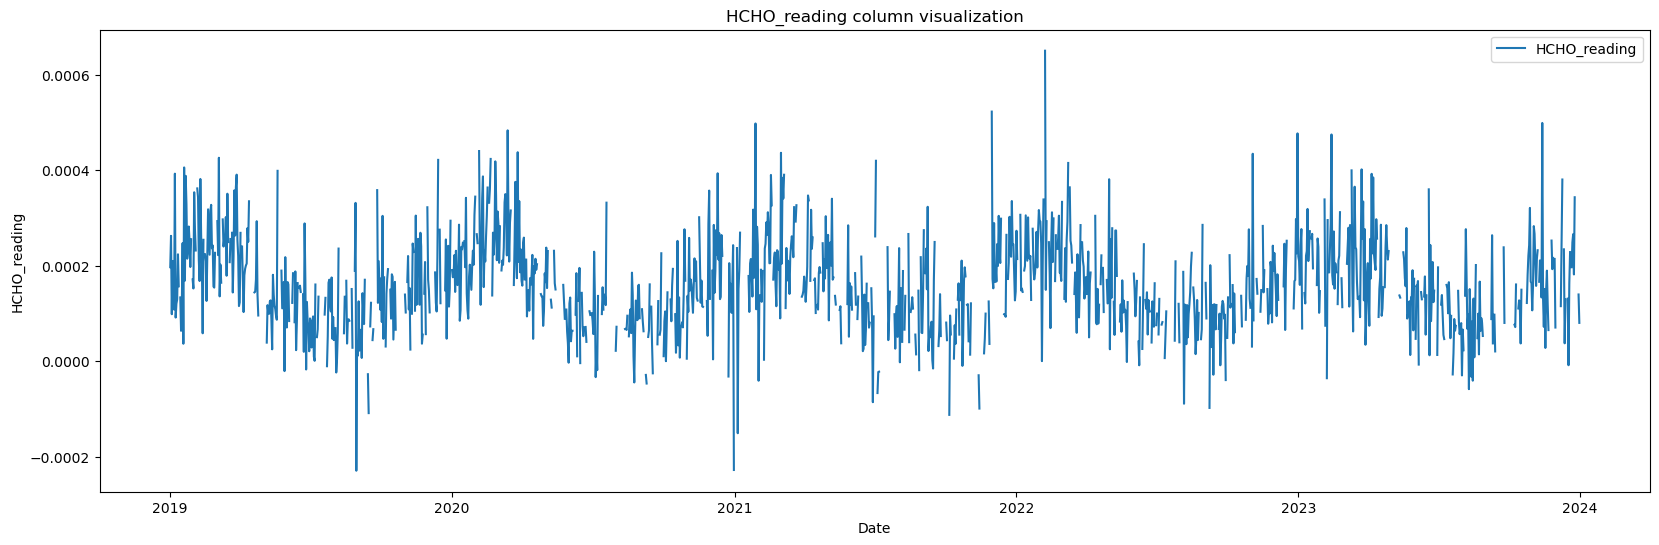

In [18]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=cmb.index, y=cmb['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

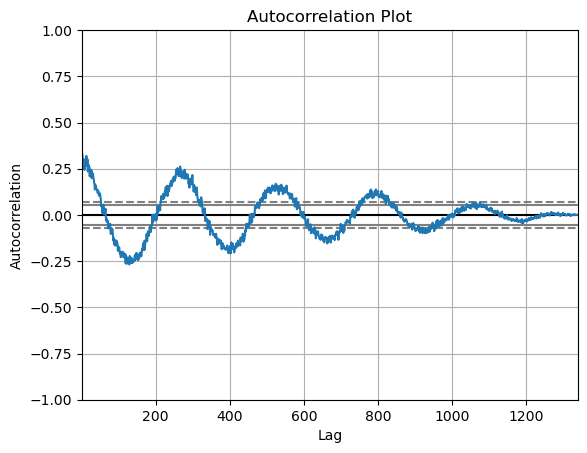

In [20]:
pd.plotting.autocorrelation_plot(cmb[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

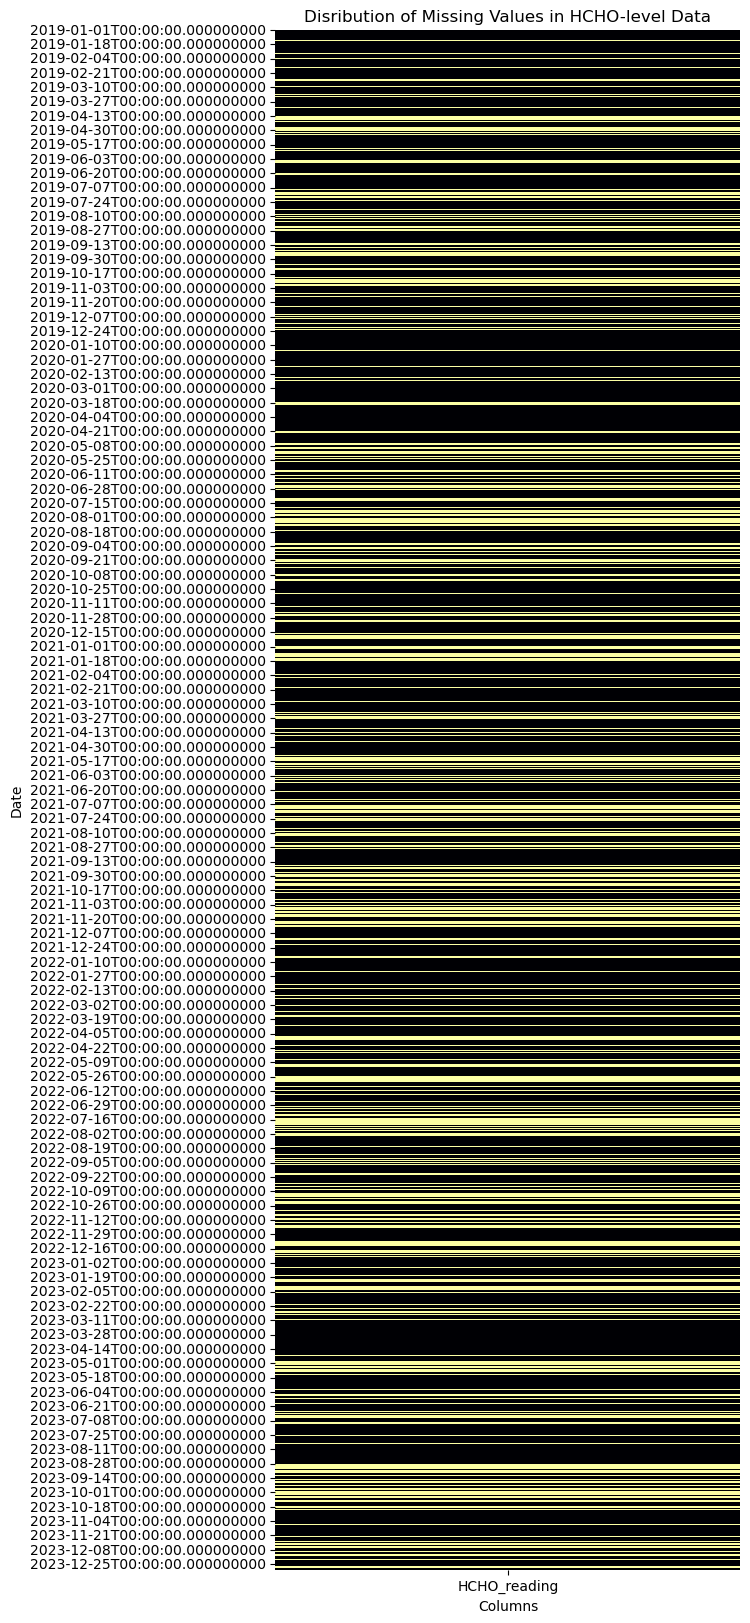

In [21]:
# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(cmb[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

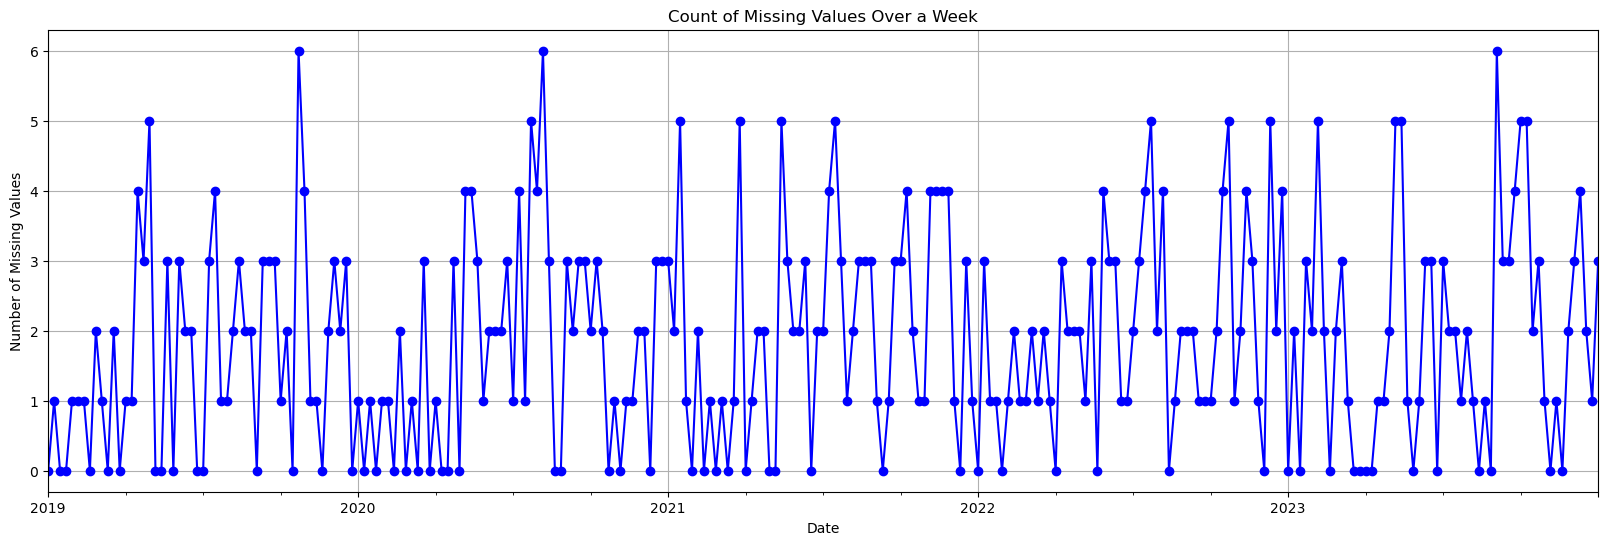

In [22]:
frequency = 'W'

missing_counts = cmb[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

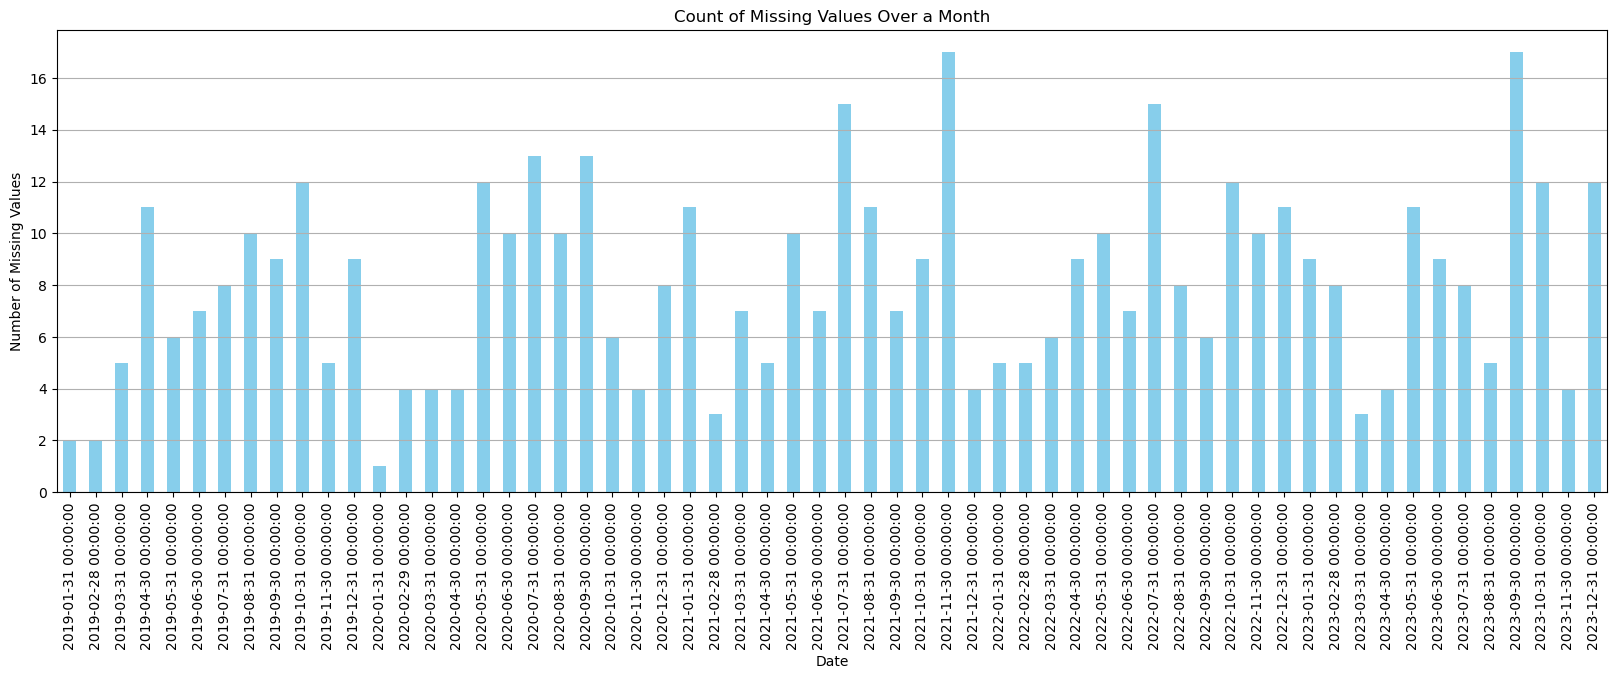

In [23]:
frequency = 'M'

missing_counts = cmb[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


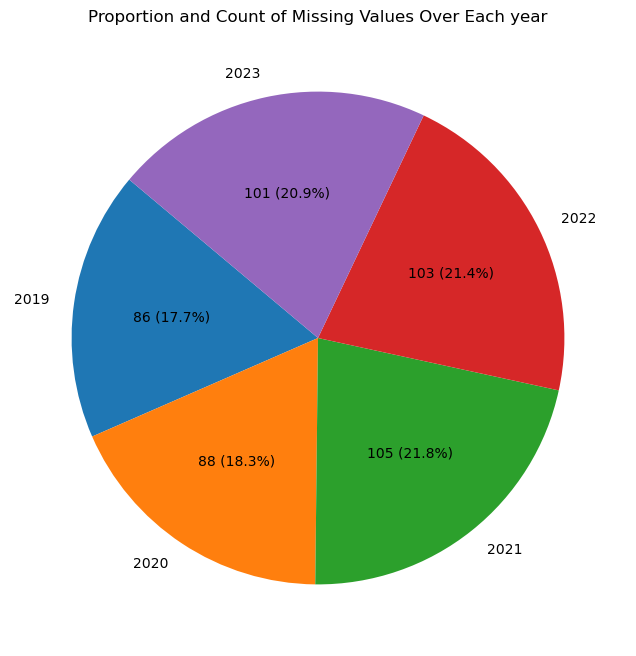

In [24]:
frequency = 'Y'

missing_counts = cmb[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


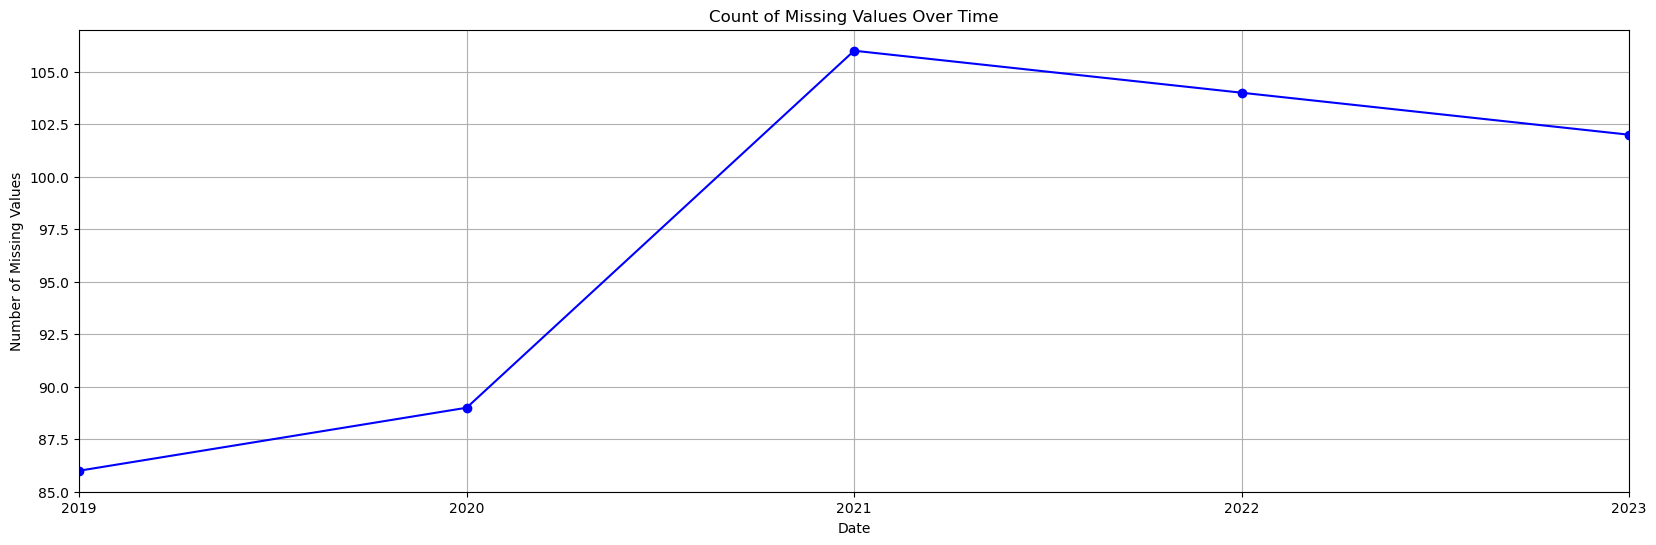

In [25]:
frequency = 'Y'

missing_counts = cmb[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

# Null Value treatment using Global Mean imputation

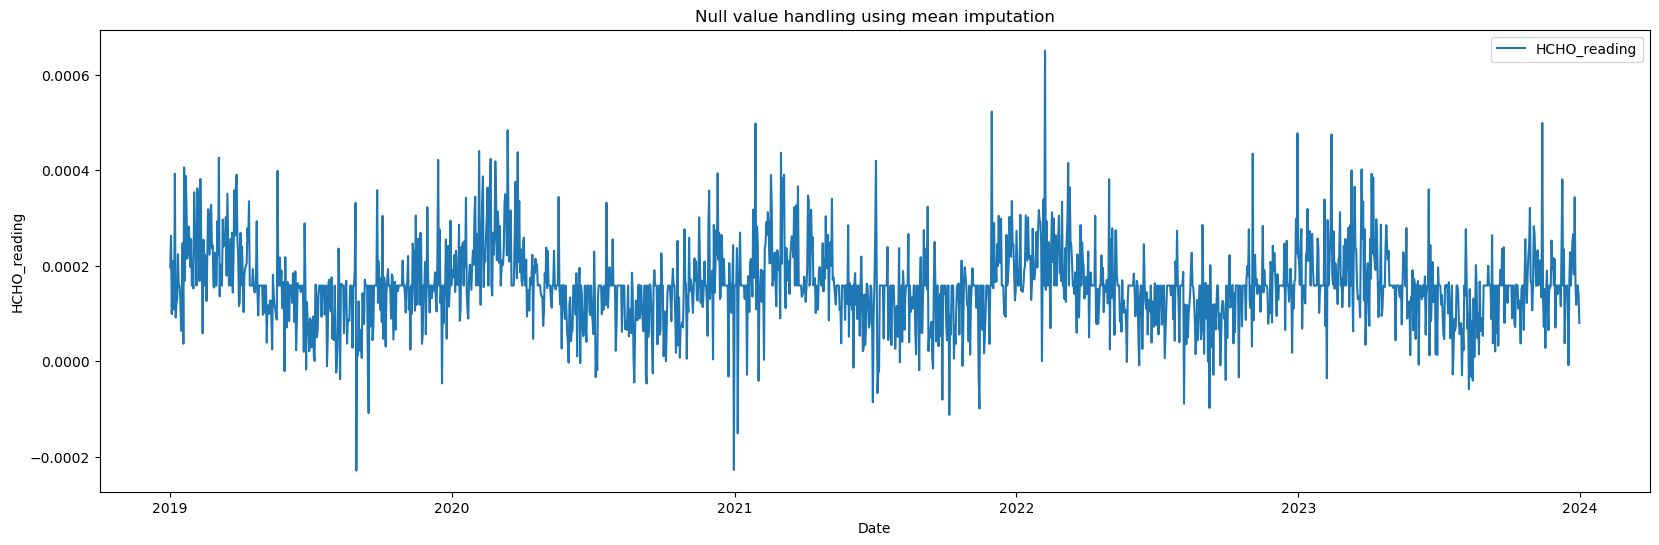

In [26]:
cmb['Mean_imputation']=cmb['HCHO_reading'].fillna(cmb['HCHO_reading'].mean())
plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["Mean_imputation"], label="HCHO_reading")
plt.title("Null value handling using mean imputation")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

# Null Value treatment using Rolling window method 3,7,30

![Alt Text](https://miro.medium.com/v2/resize:fit:1400/1*YD2Jb7dsRlRRcn5vEtO2JQ.png)

<img src="rolling_window.png" alt="Alt Text" width="500"/>

https://medium.com/@aaabulkhair/data-imputation-demystified-time-series-data-69bc9c798cb7
https://medium.com/towards-data-science/handling-gaps-in-time-series-dc47ae883990

## Method 1
## A method to fill null values using rolling window mean technique

In [27]:
def rolling_window(size,df,column,n=0):
    
#     filled_column_name = f'rolling_{size}'
#     df[filled_column_name] = df[column]
    
    num=0
    while (df[column].isnull().sum()>n):
        num+=1
        df[column]=df[column].fillna(df[column].rolling(window=size, min_periods=1).mean())
    plt.figure(figsize=(20, 6))
    plt.plot( df.index, df[column], label=column)
    plt.title(f"{column} visualization")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()
    plt.show()
    print('num of iterations, ',num)

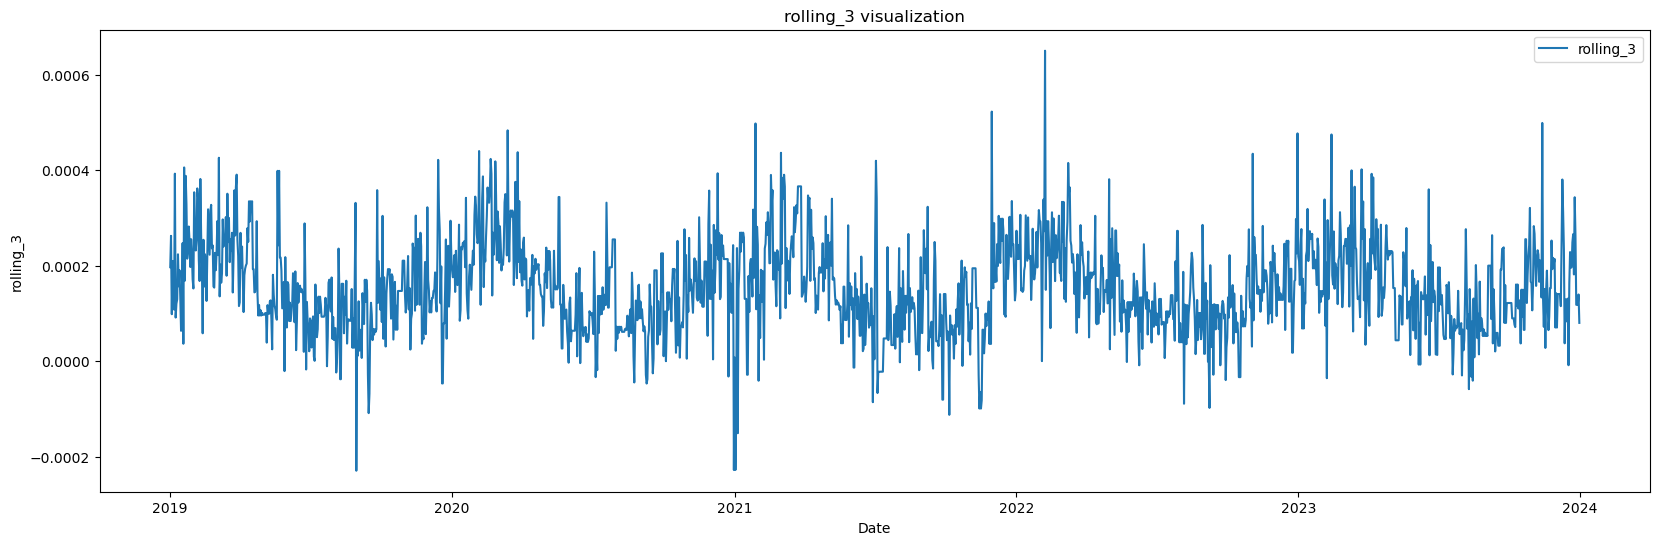

num of iterations,  4


In [28]:
size=3
cmb[f'rolling_{size}']=cmb['HCHO_reading']
rolling_window(size,cmb,f'rolling_{size}')

## Method 2

## This method fills null values in the 'HCHO_reading_filled' column by taking the mean of non-null values for the same day across different years and then applying a rolling window mean. 

## This method aims to fill null values by leveraging the temporal pattern of the data, specifically by using the mean of non-null values for the same day across different years. Additionally, it applies a rolling window mean to further smooth the filled values and potentially capture any remaining fluctuations in the data.

In [29]:
def fill_nulls_with_mean(df, column_name='HCHO_reading_filled', start_date='2019-01-01', end_date='2024-01-01'):
    # Create a new column in the DataFrame to store the filled values
#     filled_column_name = f"{column_name}_filled"
#     df[filled_column_name] = df[column_name]

    # Create a DataFrame with the range of dates
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')

    # Iterate over each null value
    for index, row in df[df[column_name].isnull()].iterrows():
        # Get the date of the null value
        null_date = row.name
        
        # Extract the month and day of the null date
        month_day = (null_date.month, null_date.day)
        
        # Filter the DataFrame to include only rows with the same month and day
        same_day_rows = df[(df.index.month == month_day[0]) & (df.index.day == month_day[1])]
        
        if same_day_rows[column_name].isnull().sum() < 3:
            # Exclude the null value itself
            same_day_rows = same_day_rows[same_day_rows.index != null_date]

            # Calculate the mean of the non-null values for the same day across years
            mean_value = same_day_rows[column_name].mean()

            # Fill the null value with the mean in the new column
            df.at[null_date, column_name] = mean_value


Previous: 487
After: 136


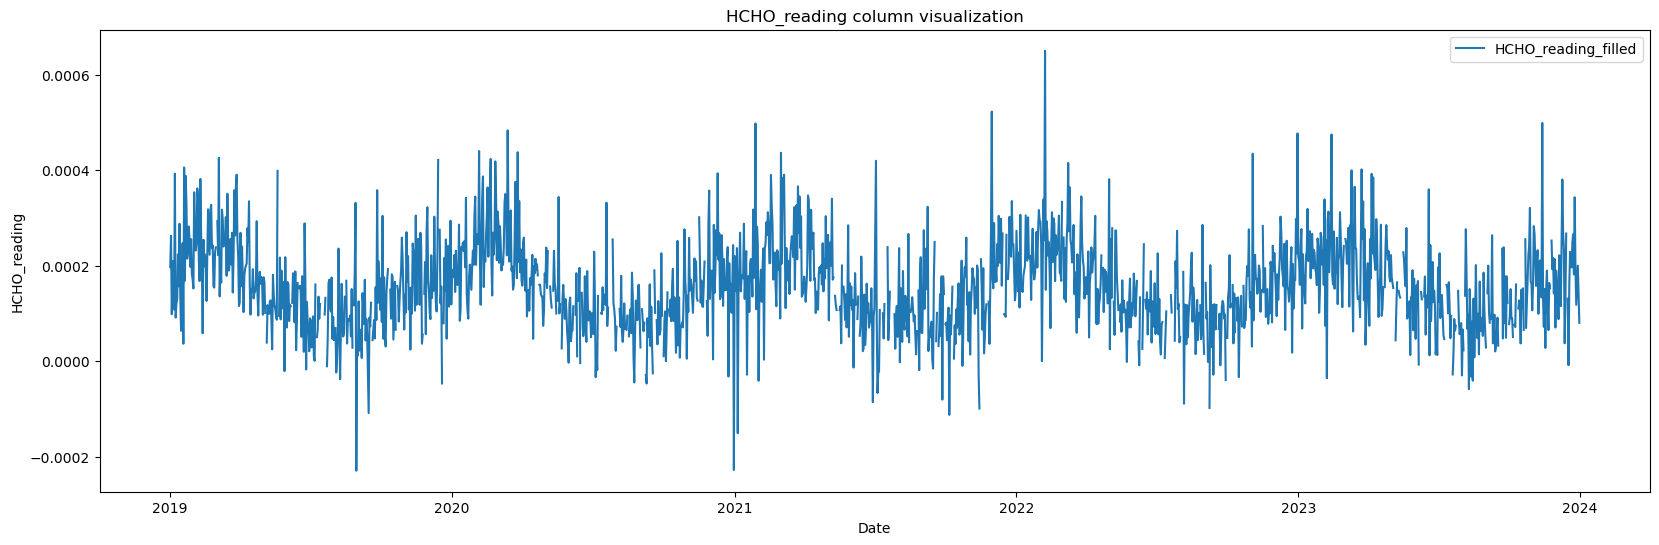

Previous: 136
After: 0


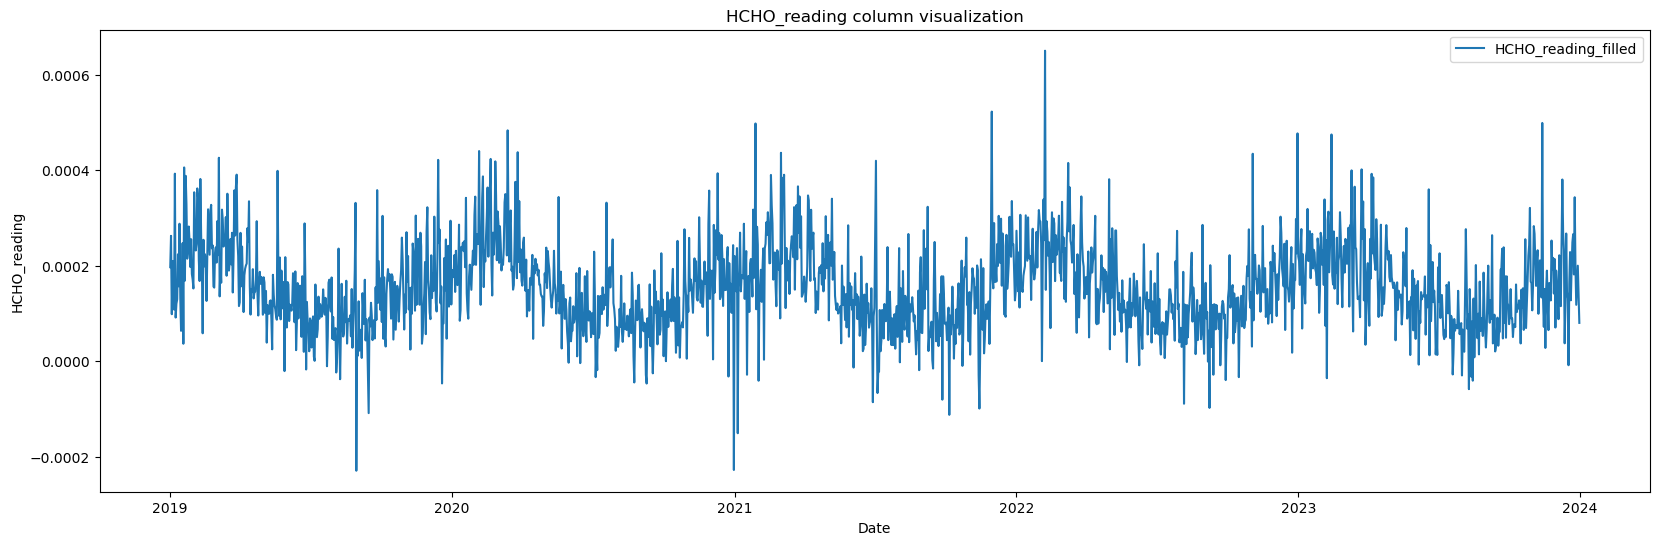

In [30]:
cmb['HCHO_reading_filled']=cmb['HCHO_reading']
fill_nulls_with_mean(cmb)
print('Previous:', cmb['HCHO_reading'].isnull().sum())
print('After:' ,cmb['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(cmb.index, cmb['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

print('Previous:', cmb['HCHO_reading_filled'].isnull().sum())
cmb['HCHO_reading_filled']=cmb['HCHO_reading_filled'].fillna(cmb['HCHO_reading_filled'].rolling(window=4, min_periods=1).mean())
print('After:' ,cmb['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(cmb.index, cmb['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [31]:
# cmb['HCHO_reading_filled'] = cmb['HCHO_reading']

# # Define the time range
# start_date = '2019-01-01'
# end_date = '2024-01-01'

# # Generate a DataFrame with the range of dates
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')



# # Iterate over each null value
# for index, row in cmb[cmb['HCHO_reading_filled'].isnull()].iterrows():
#     # Get the date of the null value
#     null_date = row.name
    
#     # Extract the month and day of the null date
#     month_day = (null_date.month, null_date.day)
    
#     # Filter the DataFrame to include only rows with the same month and day
#     same_day_rows = cmb[(cmb.index.month == month_day[0]) & (cmb.index.day == month_day[1])]
    
#     if same_day_rows['HCHO_reading_filled'].isnull().sum()<3:
    
#         # Exclude the null value itself
#         same_day_rows = same_day_rows[same_day_rows.index != null_date]

#         # Calculate the mean of the non-null values for the same day across years
#         mean_value = same_day_rows['HCHO_reading_filled'].mean()

#         # Fill the null value with the mean
#         cmb.at[null_date, 'HCHO_reading_filled'] = mean_value
        
# print('Previous:', cmb['HCHO_reading'].isnull().sum())
# print('After:' ,cmb['HCHO_reading_filled'].isnull().sum())

# # Display the DataFrame with the filled values
# plt.figure(figsize=(20, 6))
# plt.plot(cmb.index, cmb['HCHO_reading_filled'], label='HCHO_reading_filled')
# plt.title("HCHO_reading column visualization")
# plt.xlabel("Date")
# plt.ylabel("HCHO_reading")
# plt.legend()
# plt.show()

# print('Previous:', cmb['HCHO_reading_filled'].isnull().sum())
# cmb['HCHO_reading_filled']=cmb['HCHO_reading_filled'].fillna(cmb['HCHO_reading_filled'].rolling(window=4, min_periods=1).mean())
# print('After:' ,cmb['HCHO_reading_filled'].isnull().sum())

# # Display the DataFrame with the filled values
# plt.figure(figsize=(20, 6))
# plt.plot(cmb.index, cmb['HCHO_reading_filled'], label='HCHO_reading_filled')
# plt.title("HCHO_reading column visualization")
# plt.xlabel("Date")
# plt.ylabel("HCHO_reading")
# plt.legend()
# plt.show()

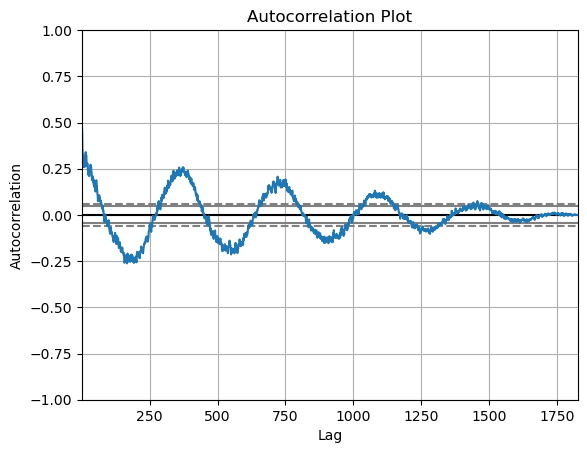

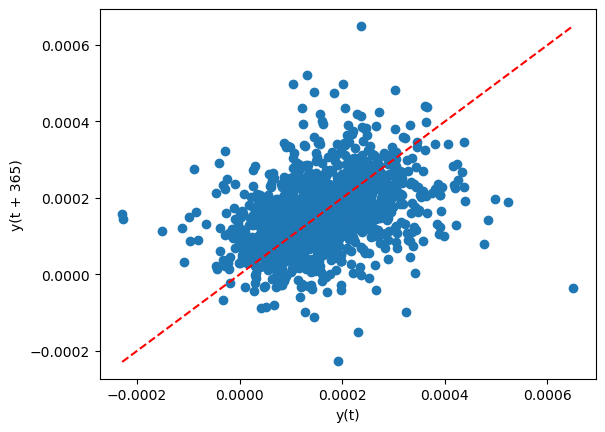

In [32]:
pd.plotting.autocorrelation_plot(cmb[['rolling_3']])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(cmb[['HCHO_reading_filled']].dropna(), lag=365)

# Add y=x line
plt.plot([cmb['HCHO_reading_filled'].min(), cmb['HCHO_reading_filled'].max()],
         [cmb['HCHO_reading_filled'].min(), cmb['HCHO_reading_filled'].max()],
         linestyle='--', color='red')

plt.show()


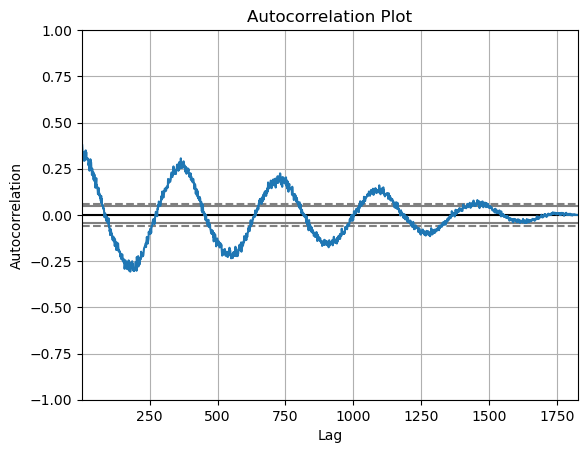

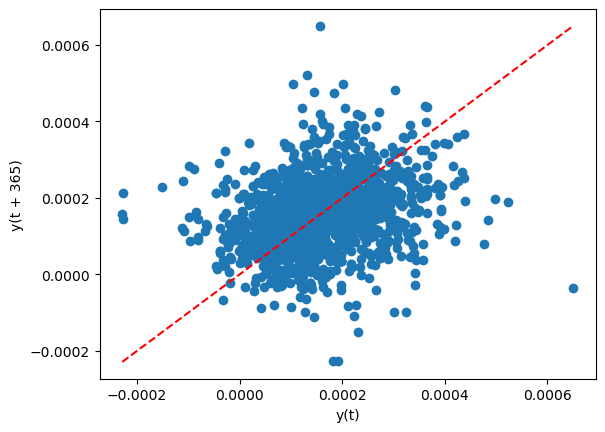

In [33]:
pd.plotting.autocorrelation_plot(cmb[['HCHO_reading_filled']])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Create the lag plot
lag_plot = pd.plotting.lag_plot(cmb[['rolling_3']].dropna(), lag=365)

# Add y=x line
plt.plot([cmb['HCHO_reading_filled'].min(), cmb['HCHO_reading_filled'].max()],
         [cmb['HCHO_reading_filled'].min(), cmb['HCHO_reading_filled'].max()],
         linestyle='--', color='red')

plt.show()

## Second method has captured the seasonality slightly better. So it will be chose over the 1st method

## Other methods

## interpolation linear, spline

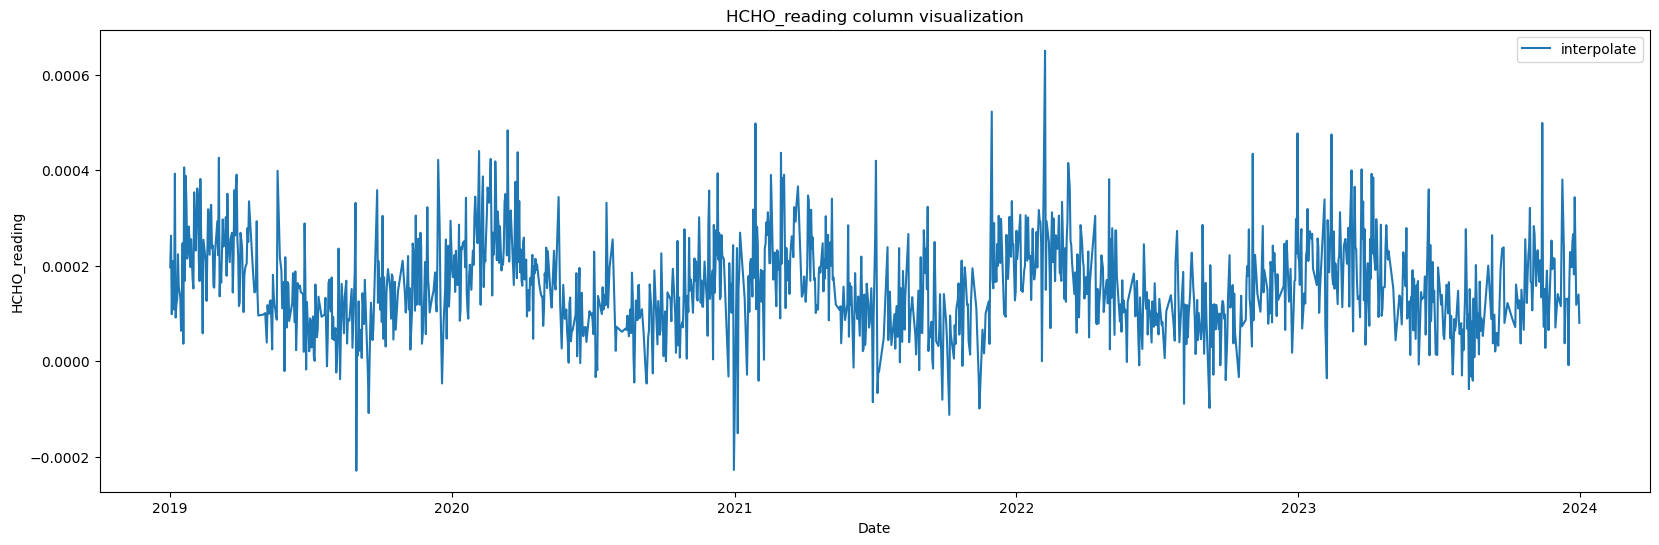

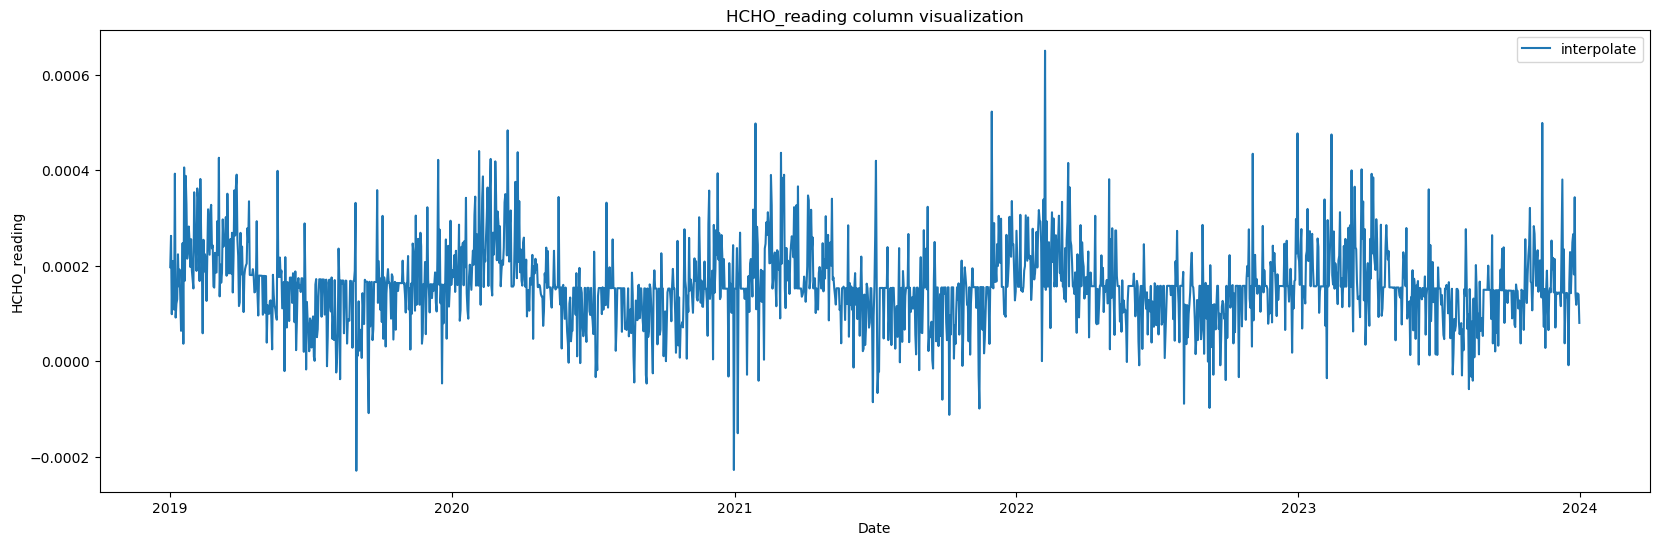

In [34]:
#Linear interpolation
cmb['linear_interpolate']=cmb['HCHO_reading'].interpolate(method='linear')
#Spline interpolation
cmb['spline_interpolate']=cmb['HCHO_reading'].interpolate(method='spline',order=3)

plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["linear_interpolate"], label="interpolate")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["spline_interpolate"], label="interpolate")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [35]:
# import plotly.graph_objs as go

# #cmb.set_index('Current_Date', inplace=True)
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=cmb.index, y=cmb['HCHO_reading'].fillna(0), mode='lines', name='HCHO_reading'))
# fig.add_trace(go.Scatter(x=cmb.index, y=cmb['rolling_3'], mode='lines', name='rolling_3'))
# fig.add_trace(go.Scatter(x=cmb.index, y=cmb['linear_interpolate'], mode='lines', name='linear_interpolate'))
# #fig.add_trace(go.Scatter(x=cmb.index, y=cmb['rolling_30'], mode='lines', name='rolling_30'))

# # Update layout
# fig.update_layout(title='HCHO-level Data',
#                   xaxis_title='Date',
#                   yaxis_title='HCHO-level',
#                   xaxis=dict(rangeslider=dict(visible=True), type='date'))

# # Show the plot
# fig.show()

# Foward Fill and Backward fill methods

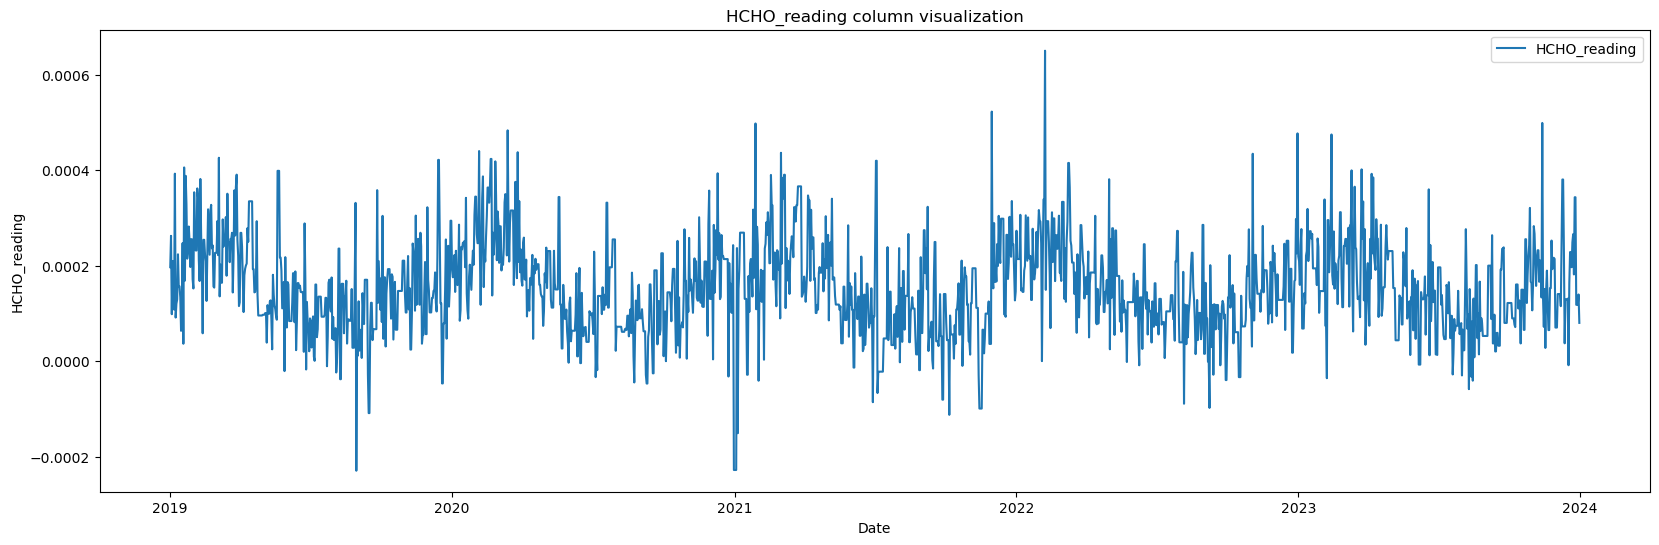

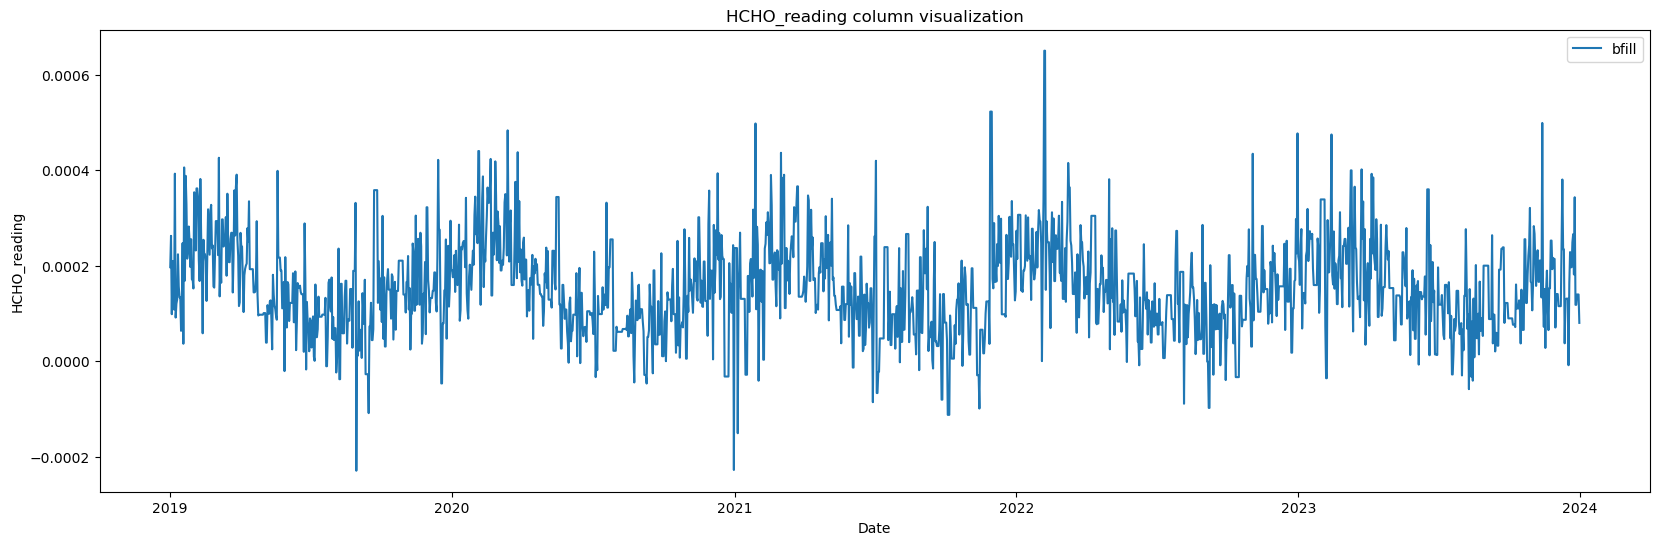

In [36]:
cmb['ffill']=cmb['HCHO_reading'].fillna(method='ffill')
cmb['bfill']=cmb['HCHO_reading'].fillna(method="bfill")

plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["ffill"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["bfill"], label="bfill")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

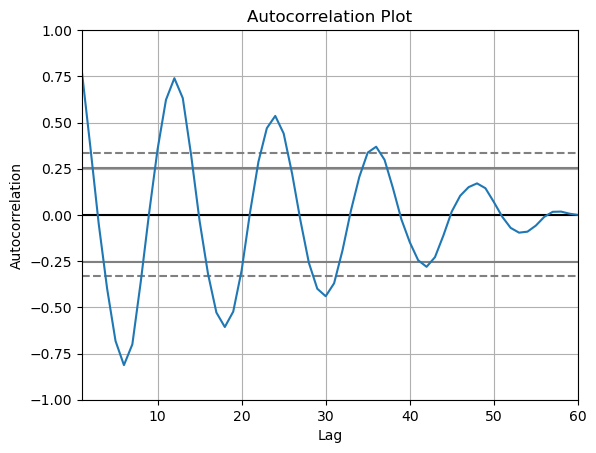

In [37]:
pd.plotting.autocorrelation_plot(cmb[['HCHO_reading_filled']].resample('1m').mean())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

## Trying to get a visual intuition of how different null value handling techniques performed

In [38]:

import pandas as pd

# Convert index to datetime if it's not already
cmb.index = pd.to_datetime(cmb.index)

# Fill null values with NaN to preserve their distinction
cmb_filled = cmb['HCHO_reading'].fillna(float('nan'))

# Create a mask for null values
null_mask = cmb_filled.isnull()

# Create traces for data with null values marked
fig = go.Figure()
fig.add_trace(go.Scatter(x=cmb.index, y=cmb_filled.where(~null_mask), mode='lines', name='HCHO_reading'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['rolling_3'], mode='lines', name='rolling_3'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['HCHO_reading_filled'], mode='lines', name='HCHO_reading_filled'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['linear_interpolate'], mode='lines', name='linear_interpolate'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['spline_interpolate'], mode='lines', name='spline_interpolate'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['ffill'], mode='lines', name='ffil'))
fig.add_trace(go.Scatter(x=cmb.index, y=cmb['bfill'], mode='lines', name='bfill'))

# Add markers for null values
fig.add_trace(go.Scatter(x=cmb.index[null_mask], y=[0] * null_mask.sum(),
                         mode='markers', marker=dict(color='red', symbol='circle-open', size=10),
                         name='Null values'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'),
                  # Set x-axis range based on minimum and maximum dates in the dataset
                  xaxis_range=[cmb.index.min(), cmb.index.max()],
                  # Set rangeslider range explicitly to match x-axis range
                  xaxis_rangeslider=dict(range=[cmb.index.min(), cmb.index.max()]))

# Show the plot
fig.show()


In [39]:
cmb.describe()

HCHO_reading                      Next_Date  Mean_imputation  \
count   1339.000000                           1826      1826.000000   
mean       0.000159  2021-07-02 12:00:00.000000256         0.000159   
min       -0.000229            2019-01-02 00:00:00        -0.000229   
25%        0.000093            2020-04-02 06:00:00         0.000118   
50%        0.000151            2021-07-02 12:00:00         0.000159   
75%        0.000221            2022-10-01 18:00:00         0.000192   
max        0.000650            2024-01-01 00:00:00         0.000650   
std        0.000099                            NaN         0.000085   

         rolling_3  HCHO_reading_filled  linear_interpolate  \
count  1826.000000          1826.000000         1826.000000   
mean      0.000153             0.000154            0.000154   
min      -0.000229            -0.000229           -0.000229   
25%       0.000089             0.000092            0.000092   
50%       0.000144             0.000146            0.000144   
75%       0.000213             0.000210            0.000211   
max       0.000650             0.000650            0.000650   
std       0.000097             0.000092            0.000094   

       spline_interpolate        ffill        bfill  
count         1826.000000  1826.000000  1826.000000  
mean             0.000158     0.000154     0.000153  
min             -0.000229    -0.000229    -0.000229  
25%              0.000118     0.000088     0.000090  
50%              0.000155     0.000145     0.000144  
75%              0.000192     0.000214     0.000211  
max              0.000650     0.000650     0.000650  
std              0.000085     0.000100     0.000099

In [40]:
cmb.drop(columns=['HCHO_reading',
                  'Mean_imputation',
                  'rolling_3',
                  'linear_interpolate',
                  'spline_interpolate', 
                  'ffill',
                  'bfill'],inplace=True)
cmb.head(15)


Location  Next_Date  HCHO_reading_filled
Current_Date                                                
2019-01-01    Colombo Proper 2019-01-02             0.000197
2019-01-02    Colombo Proper 2019-01-03             0.000263
2019-01-03    Colombo Proper 2019-01-04             0.000099
2019-01-04    Colombo Proper 2019-01-05             0.000210
2019-01-05    Colombo Proper 2019-01-06             0.000179
2019-01-06    Colombo Proper 2019-01-07             0.000108
2019-01-07    Colombo Proper 2019-01-08             0.000393
2019-01-08    Colombo Proper 2019-01-09             0.000092
2019-01-09    Colombo Proper 2019-01-10             0.000121
2019-01-10    Colombo Proper 2019-01-11             0.000130
2019-01-11    Colombo Proper 2019-01-12             0.000224
2019-01-12    Colombo Proper 2019-01-13             0.000157
2019-01-13    Colombo Proper 2019-01-14             0.000288
2019-01-14    Colombo Proper 2019-01-15             0.000134
2019-01-15    Colombo Proper 2019-01-16             0.000064

# Outlier detection

Outlier number 19


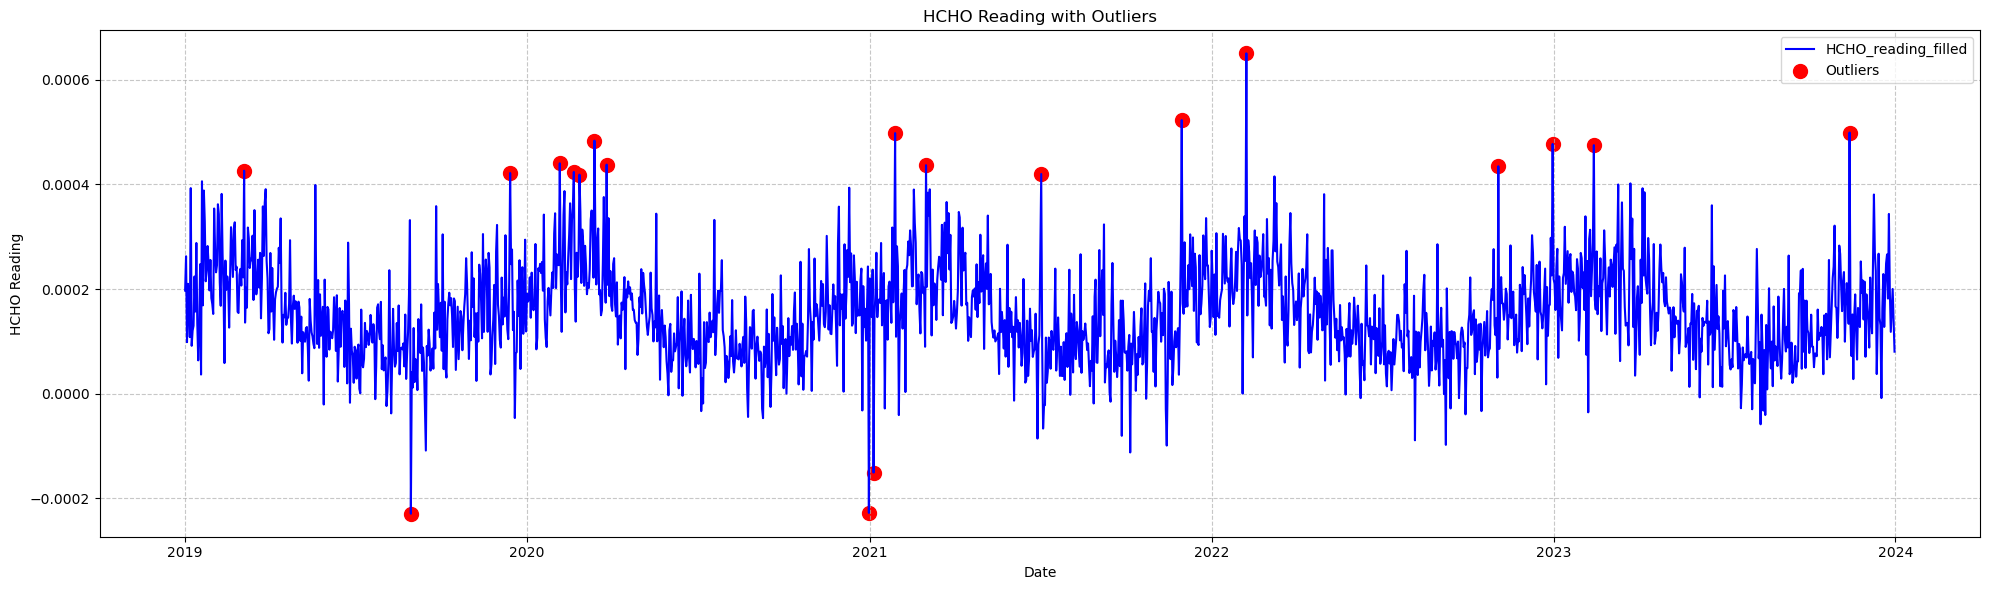

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the first and third quartiles
Q1 = np.percentile(cmb["HCHO_reading_filled"], 25)
Q3 = np.percentile(cmb["HCHO_reading_filled"], 75)
IQR = Q3 - Q1

threshold = 1.75 * IQR

# Find the outliers
outliers = (cmb["HCHO_reading_filled"] < Q1 - threshold) | (cmb["HCHO_reading_filled"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))

# Plot the main data
plt.plot(cmb.index, cmb["HCHO_reading_filled"], label="HCHO_reading_filled", color='blue')

# Plot outliers
plt.scatter(cmb.index[outliers], cmb["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("HCHO Reading with Outliers")
plt.xlabel("Date")
plt.ylabel("HCHO Reading")
plt.legend()
plt.tight_layout()
plt.show()


#### Setting the outlier values to null so we can fill them again with null value imputation

In [42]:
import numpy as np
cmb['outlier_cleaned']=cmb["HCHO_reading_filled"]
cmb['outlier_cleaned'][outliers]=np.nan
cmb['outlier_cleaned'].isnull().sum()

19

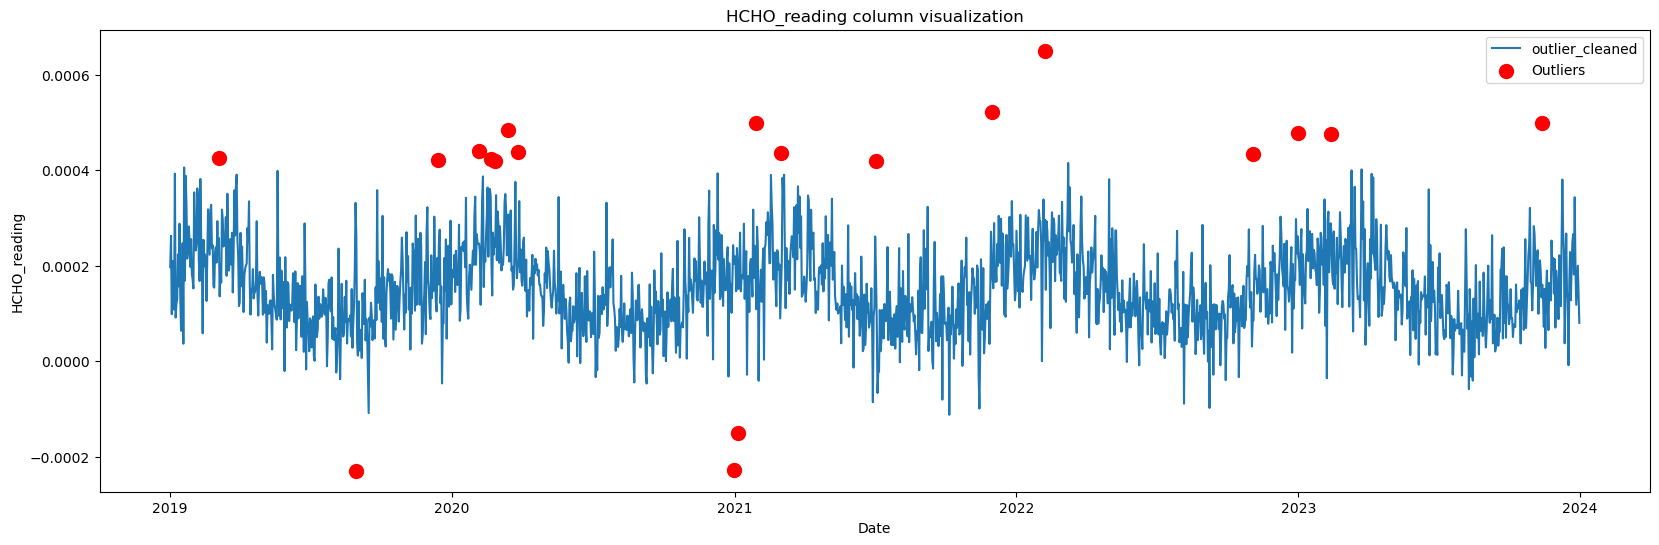

In [43]:
#Rolling window method with window size-3 on a loop untill number of null values become 0


while (cmb['outlier_cleaned'].isnull().sum()>0):
    cmb['outlier_cleaned']=cmb['outlier_cleaned'].fillna(cmb['outlier_cleaned'].rolling(window=3, min_periods=1).mean())
plt.figure(figsize=(20, 6))
plt.plot( cmb.index, cmb["outlier_cleaned"], label="outlier_cleaned")
plt.scatter(cmb.index[outliers], cmb["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [44]:
cmb.rename(columns={'outlier_cleaned': 'HCHO_reading'}, inplace=True)

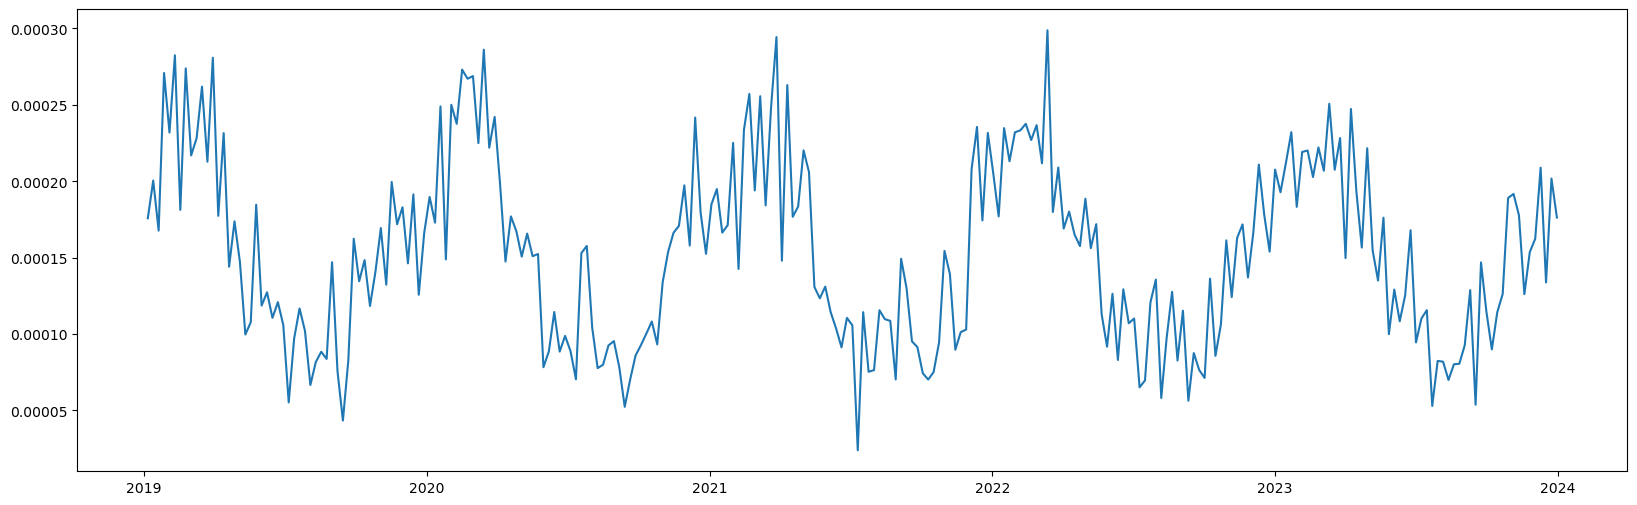

In [45]:
#cmb.groupby(cmb.index.year)

#cmb[['HCHO_reading']].resample('1w').mean()
plt.figure(figsize=(20, 6))
plt.plot(  cmb[['HCHO_reading']].resample('1w').mean(), label="outlier_cleaned")

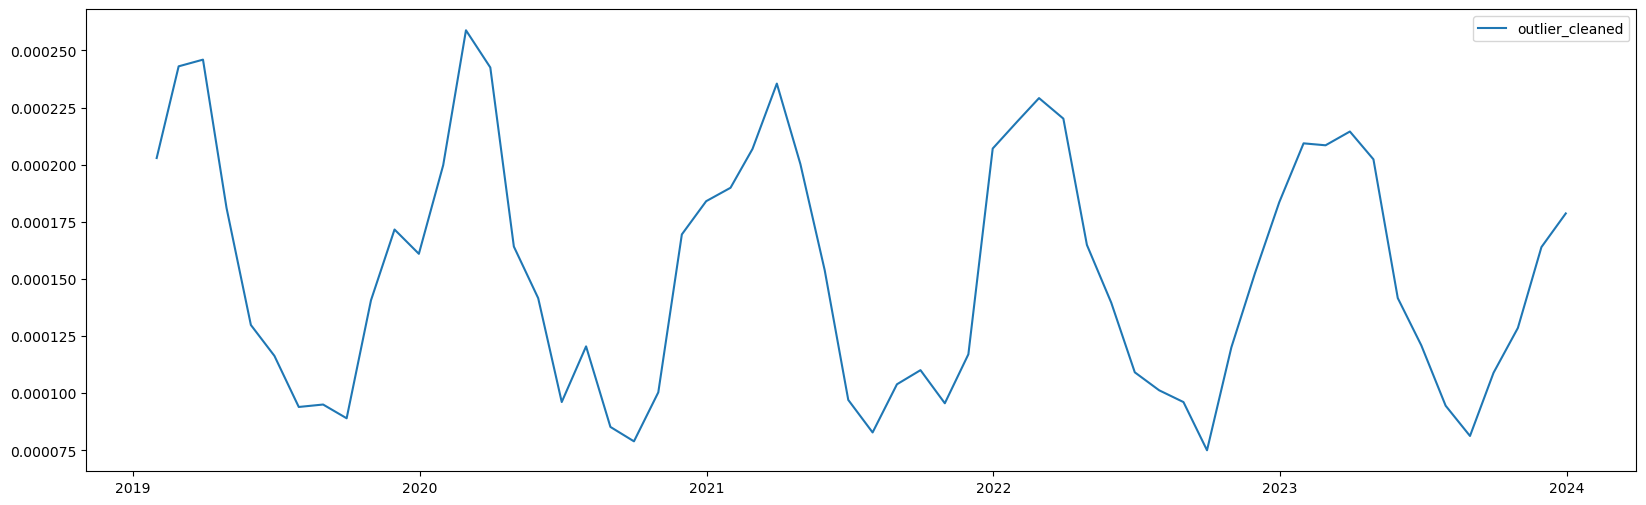

In [46]:
plt.figure(figsize=(20, 6))
#plt.plot(  cmb[['HCHO_reading']].resample('1m').mean(), label="HCHO_reading")
plt.plot(  cmb[['HCHO_reading']].resample('1m').mean(), label="outlier_cleaned")
plt.legend()
plt.show()

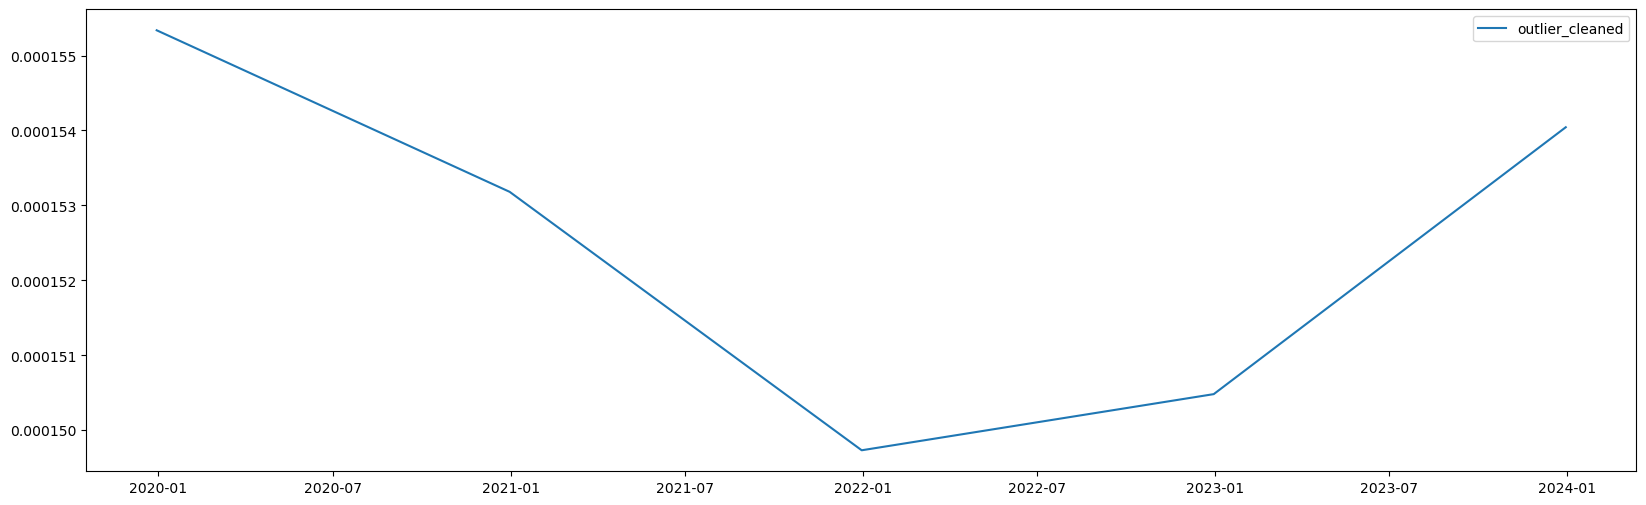

In [47]:
plt.figure(figsize=(20, 6))
#plt.plot(  cmb[['HCHO_reading']].resample('1y').mean(), label="HCHO_reading")
plt.plot(  cmb[['HCHO_reading']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()

In [48]:
# import numpy as np
# import pandas as pd

# # Sample data
# d = ['HCHO_reading', 'Mean_imputation', 'rolling_3',
#        'rolling_7', 'rolling_30', 'linear_interpolate', 'spline_interpolate','outlier_cleaned']


# # Calculate the MSE between each pair of columns
# mse_matrix = np.zeros((len(d), len(d)))
# for i, col1 in enumerate(d):
#     for j, col2 in enumerate(d):
#         mse_matrix[i, j] = ((cmb[col1] - cmb[col2]) ** 2).mean()

# # Create a DataFrame from the MSE matrix
# mse_df = pd.DataFrame(mse_matrix, columns=d, index=d)
# mse_df


In [49]:
cmb.drop(columns=['HCHO_reading_filled'],inplace=True)
cmb.reset_index(inplace=True)
cmb.sort_values(by=['Current_Date'])
cmb

Current_Date        Location  Next_Date  HCHO_reading
0      2019-01-01  Colombo Proper 2019-01-02  1.969834e-04
1      2019-01-02  Colombo Proper 2019-01-03  2.625522e-04
2      2019-01-03  Colombo Proper 2019-01-04  9.852119e-05
3      2019-01-04  Colombo Proper 2019-01-05  2.099321e-04
4      2019-01-05  Colombo Proper 2019-01-06  1.785337e-04
5      2019-01-06  Colombo Proper 2019-01-07  1.082297e-04
6      2019-01-07  Colombo Proper 2019-01-08  3.926829e-04
7      2019-01-08  Colombo Proper 2019-01-09  9.153156e-05
8      2019-01-09  Colombo Proper 2019-01-10  1.205979e-04
9      2019-01-10  Colombo Proper 2019-01-11  1.297724e-04
10     2019-01-11  Colombo Proper 2019-01-12  2.239188e-04
11     2019-01-12  Colombo Proper 2019-01-13  1.569418e-04
12     2019-01-13  Colombo Proper 2019-01-14  2.879156e-04
13     2019-01-14  Colombo Proper 2019-01-15  1.336292e-04
14     2019-01-15  Colombo Proper 2019-01-16  6.374418e-05
15     2019-01-16  Colombo Proper 2019-01-17  1.181062e-04
16     2019-01-17  Colombo Proper 2019-01-18  2.472555e-04
17     2019-01-18  Colombo Proper 2019-01-19  3.667525e-05
18     2019-01-19  Colombo Proper 2019-01-20  4.057501e-04
19     2019-01-20  Colombo Proper 2019-01-21  1.687856e-04
20     2019-01-21  Colombo Proper 2019-01-22  3.881549e-04
21     2019-01-22  Colombo Proper 2019-01-23  3.282923e-04
22     2019-01-23  Colombo Proper 2019-01-24  2.147798e-04
23     2019-01-24  Colombo Proper 2019-01-25  2.347245e-04
24     2019-01-25  Colombo Proper 2019-01-26  2.820915e-04
25     2019-01-26  Colombo Proper 2019-01-27  2.507263e-04
26     2019-01-27  Colombo Proper 2019-01-28  1.973288e-04
27     2019-01-28  Colombo Proper 2019-01-29  2.555122e-04
28     2019-01-29  Colombo Proper 2019-01-30  1.826797e-04
29     2019-01-30  Colombo Proper 2019-01-31  1.713636e-04
30     2019-01-31  Colombo Proper 2019-02-01  1.523802e-04
31     2019-02-01  Colombo Proper 2019-02-02  3.537610e-04
32     2019-02-02  Colombo Proper 2019-02-03  2.755729e-04
33     2019-02-03  Colombo Proper 2019-02-04  2.318846e-04
34     2019-02-04  Colombo Proper 2019-02-05  2.454316e-04
35     2019-02-05  Colombo Proper 2019-02-06  3.618488e-04
36     2019-02-06  Colombo Proper 2019-02-07  3.430664e-04
37     2019-02-07  Colombo Proper 2019-02-08  2.123315e-04
38     2019-02-08  Colombo Proper 2019-02-09  1.679798e-04
39     2019-02-09  Colombo Proper 2019-02-10  3.816050e-04
40     2019-02-10  Colombo Proper 2019-02-11  2.650819e-04
41     2019-02-11  Colombo Proper 2019-02-12  1.981790e-04
42     2019-02-12  Colombo Proper 2019-02-13  5.858718e-05
43     2019-02-13  Colombo Proper 2019-02-14  2.542806e-04
44     2019-02-14  Colombo Proper 2019-02-15  1.985345e-04
45     2019-02-15  Colombo Proper 2019-02-16  2.239912e-04
46     2019-02-16  Colombo Proper 2019-02-17  2.091493e-04
47     2019-02-17  Colombo Proper 2019-02-18  1.262731e-04
48     2019-02-18  Colombo Proper 2019-02-19  2.255146e-04
49     2019-02-19  Colombo Proper 2019-02-20  3.180787e-04
50     2019-02-20  Colombo Proper 2019-02-21  2.720768e-04
51     2019-02-21  Colombo Proper 2019-02-22  2.230429e-04
52     2019-02-22  Colombo Proper 2019-02-23  3.148950e-04
53     2019-02-23  Colombo Proper 2019-02-24  3.274182e-04
54     2019-02-24  Colombo Proper 2019-02-25  2.362990e-04
55     2019-02-25  Colombo Proper 2019-02-26  2.424675e-04
56     2019-02-26  Colombo Proper 2019-02-27  1.564597e-04
57     2019-02-27  Colombo Proper 2019-02-28  1.542017e-04
58     2019-02-28  Colombo Proper 2019-03-01  2.270068e-04
59     2019-03-01  Colombo Proper 2019-03-02  2.384299e-04
60     2019-03-02  Colombo Proper 2019-03-03  2.065461e-04
61     2019-03-03  Colombo Proper 2019-03-04  2.934140e-04
62     2019-03-04  Colombo Proper 2019-03-05  2.222321e-04
63     2019-03-05  Colombo Proper 2019-03-06  2.578231e-04
64     2019-03-06  Colombo Proper 2019-03-07  1.358520e-04
65     2019-03-07  Colombo Proper 2019-03-08  2.023807e-04
66     2019-03-08  Colombo Proper 2019-03-09  1.6442

In [50]:
cmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Current_Date  1826 non-null   datetime64[ns]
 1   Location      1826 non-null   object        
 2   Next_Date     1826 non-null   datetime64[ns]
 3   HCHO_reading  1826 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 57.2+ KB


In [53]:
cmb.to_csv(r"processed data\temp\colombo_fomaldehyde.csv", index=False)

In [ ]:
//

# Matara Deniyaya preprocessing

In [ ]:
mtr.info()

In [ ]:
mtr.describe()

In [ ]:
# Step 1: Check Time Range
min_date = mtr['Current_Date'].min()
max_date = mtr['Current_Date'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(df['Current_Date'])]

if len(missing_values) == 0:
    print("No missing values found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


In [ ]:
mtr.set_index('Current_Date', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( mtr.index, mtr["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objs as go


fig = go.Figure()


fig.add_trace(go.Scatter(x=mtr.index, y=mtr['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
pd.plotting.autocorrelation_plot(mtr[['HCHO_reading']].dropna().resample('1m').mean())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

In [ ]:
import seaborn as sns

# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(mtr[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = mtr[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = mtr[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = mtr[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


# Rolling window method

In [ ]:
mtr.head(5)

In [ ]:
size=4
mtr[f'rolling_{size}']=mtr['HCHO_reading']
rolling_window(size,mtr,f'rolling_{size}',n=1)
mtr[f'rolling_{size}']=mtr[f'rolling_{size}'].fillna(method='bfill')
mtr[f'rolling_{size}'].isnull().sum()

# Foward Fill and Backward fill methods

In [ ]:
mtr['ffill']=mtr['HCHO_reading'].fillna(method='ffill')
plt.figure(figsize=(20, 6))
plt.plot( mtr.index, mtr["ffill"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

mtr['bfill']=mtr['HCHO_reading'].fillna(method="bfill")
plt.figure(figsize=(20, 6))
plt.plot( mtr.index, mtr["bfill"], label="bfill")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
pd.plotting.autocorrelation_plot(mtr[['rolling_4']])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(mtr[['rolling_4']].dropna(), lag=365)

# Add y=x line
plt.plot([mtr['rolling_4'].min(), mtr['rolling_4'].max()],
         [mtr['rolling_4'].min(), mtr['rolling_4'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
# import plotly.graph_objs as go

# #cmb.set_index('Current_Date', inplace=True)
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=mtr.index, y=mtr['HCHO_reading'].fillna(0), mode='lines', name='HCHO_reading'))
# fig.add_trace(go.Scatter(x=mtr.index, y=mtr['rolling_3'], mode='lines', name='rolling_3'))
# fig.add_trace(go.Scatter(x=mtr.index, y=mtr['rolling_30'], mode='lines', name='rolling_30'))
# fig.add_trace(go.Scatter(x=mtr.index, y=mtr['HCHO_reading_filled'], mode='lines', name='HCHO_reading_filled'))
# #fig.add_trace(go.Scatter(x=cmb.index, y=cmb['rolling_30'], mode='lines', name='rolling_30'))

# # Update layout
# fig.update_layout(title='HCHO-level Data',
#                   xaxis_title='Date',
#                   yaxis_title='HCHO-level',
#                   xaxis=dict(rangeslider=dict(visible=True), type='date'))

# # Show the plot
# fig.show()

In [ ]:
mtr.drop(columns=['HCHO_reading',
                  'ffill',
                  'bfill'],inplace=True)
mtr.head(15)


# Outlier Detection

In [ ]:
import numpy as np

# Calculate the first and third quartiles
Q1 = np.percentile(mtr["rolling_4"], 25)
Q3 = np.percentile(mtr["rolling_4"], 75)
IQR = Q3 - Q1

threshold = 2.5 * IQR

# Find the outliers
outliers = (mtr["rolling_4"] < Q1 - threshold) | (mtr["rolling_4"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))
plt.plot(mtr.index, mtr["rolling_4"], label="rolling_4")
plt.scatter(mtr.index[outliers], mtr["rolling_4"][outliers], color='red', label='Outliers')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()


In [ ]:
import numpy as np
mtr['outlier_cleaned']=mtr["rolling_4"]
mtr['outlier_cleaned'][outliers]=np.nan
mtr['outlier_cleaned'].isnull().sum()

In [ ]:
#Rolling window method with window size-3 on a loop untill number of null values become 0

#cmb['rolling_3']=cmb['HCHO_reading']
while (mtr['outlier_cleaned'].isnull().sum()>0):
    mtr['outlier_cleaned']=mtr['outlier_cleaned'].fillna(mtr['outlier_cleaned'].rolling(window=3, min_periods=1).mean())
plt.figure(figsize=(20, 6))
plt.plot( mtr.index, mtr["outlier_cleaned"], label="outlier_cleaned")
plt.scatter(mtr.index[outliers], mtr["rolling_4"][outliers], color='red', marker='o', s=100, label='Outliers')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
#cmb.groupby(cmb.index.year)

#cmb[['HCHO_reading']].resample('1w').mean()
plt.figure(figsize=(20, 6))
plt.plot(  mtr[['outlier_cleaned']].resample('1w').sum(), label="outlier_cleaned")

In [ ]:
plt.figure(figsize=(25, 10))
a = mtr['outlier_cleaned'].resample('1w').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}-{i.day}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="outlier_cleaned")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
a = mtr['outlier_cleaned'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="outlier_cleaned")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="outlier", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
a = mtr['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="outlier_cleaned")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
a = mtr['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="outlier_cleaned")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar( mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr['outlier_cleaned'].resample('1y').mean(), label="outlier_cleaned")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
mtr.drop(columns=['rolling_4'],inplace=True)
mtr.rename(columns={'outlier_cleaned': 'HCHO_reading'}, inplace=True)
mtr.reset_index(inplace=True)
mtr.sort_values(by=['Current_Date'])
mtr.head(20)

# Nuwara eliya

In [ ]:
ne.info()

In [ ]:
ne.describe()

In [ ]:
# Step 1: Check Time Range
min_date = ne['Current_Date'].min()
max_date = ne['Current_Date'].max()
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(ne['Current_Date'])]

if len(missing_values) == 0:
    print("No missing values found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( ne["Current_Date"], ne["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
ne.set_index('Current_Date', inplace=True)
fig = go.Figure()


fig.add_trace(go.Scatter(x=ne.index, y=ne['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
import seaborn as sns

# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(ne[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = ne[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = ne[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = ne[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


In [ ]:
ne.head(10)

In [ ]:
ne['HCHO_reading_filled']=ne['HCHO_reading']

ne['HCHO_reading_filled']=ne['HCHO_reading_filled'].fillna(ne['HCHO_reading_filled'].rolling(window=5, min_periods=1).mean())
fill_nulls_with_mean(ne)
ne['HCHO_reading_filled']=ne['HCHO_reading_filled'].fillna(ne['HCHO_reading_filled'].rolling(window=5, min_periods=1).mean())
fill_nulls_with_mean(ne)

print('Previous:', ne['HCHO_reading'].isnull().sum())
print('After:' ,ne['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(ne.index, ne['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

print('Previous:', ne['HCHO_reading_filled'].isnull().sum())
rolling_window(3,ne,'HCHO_reading_filled',n=2)
ne['HCHO_reading_filled']=ne['HCHO_reading_filled'].fillna(method='bfill')
print('After:' ,ne['HCHO_reading_filled'].isnull().sum())


# Interpolate

In [ ]:
#Spline interpolation
ne['linear_interpolate']=ne['HCHO_reading'].interpolate(method='linear')
plt.figure(figsize=(20, 6))
plt.plot( ne.index, ne["linear_interpolate"], label="interpolate")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

# Outlier 

In [ ]:
import numpy as np

# Calculate the first and third quartiles
Q1 = np.percentile(ne["HCHO_reading_filled"], 25)
Q3 = np.percentile(ne["HCHO_reading_filled"], 75)
IQR = Q3 - Q1

threshold = 2 * IQR

# Find the outliers
outliers = (ne["HCHO_reading_filled"] < Q1 - threshold) | (ne["HCHO_reading_filled"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))
plt.plot(ne.index, ne["HCHO_reading_filled"], label="HCHO_reading_filled")
plt.scatter(ne.index[outliers], ne["HCHO_reading_filled"][outliers], color='red', label='Outliers')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()


In [ ]:
import numpy as np
ne['outlier_cleaned']=ne["HCHO_reading_filled"]
ne['outlier_cleaned'][outliers]=np.nan
ne['outlier_cleaned'].isnull().sum()

In [ ]:
#Rolling window method with window size-3 on a loop untill number of null values become 0

#cmb['rolling_3']=cmb['HCHO_reading']
while (ne['outlier_cleaned'].isnull().sum()>0):
    ne['outlier_cleaned']=ne['outlier_cleaned'].fillna(ne['outlier_cleaned'].rolling(window=3, min_periods=1).mean())
plt.figure(figsize=(20, 6))
plt.plot( ne.index, ne["outlier_cleaned"], label="outlier_cleaned")
plt.scatter(ne.index[outliers], ne["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
ne.columns

In [ ]:
pd.plotting.autocorrelation_plot(ne[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

pd.plotting.autocorrelation_plot(ne[['outlier_cleaned']])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
a = ne['outlier_cleaned'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="outlier_cleaned")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="outlier", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = ne['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = ne['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar( ne['outlier_cleaned'].resample('1y').mean().index.year,ne['outlier_cleaned'].resample('1y').mean(), label="outlier_cleaned")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
ne.drop(columns=['HCHO_reading',
                 'HCHO_reading_filled',
                 'linear_interpolate',],inplace=True)

ne.rename(columns={'outlier_cleaned': 'HCHO_reading'}, inplace=True)
ne.reset_index(inplace=True)
ne.sort_values(by=['Current_Date'])
ne.head(20)

<div style="border-bottom: 2px solid black;"></div>

# Second data set

In [ ]:
df2=pd.read_csv('raw_data/mon_kur_jaf_output.csv',header=None)
print(df2.shape)
df2.head(10)

In [ ]:
column_names=['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df2.columns=column_names
df2.head(10)

In [ ]:
df2.info()

In [ ]:
try:
    # Convert 'Current_Date' to DateTime format
    df2['Current_Date'] = pd.to_datetime(df2['Current_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

try:
    # Convert 'Current_Date' to DateTime format
    df2['Next_Date'] = pd.to_datetime(df2['Next_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")


In [ ]:
df2.info()

In [ ]:
df2['Location'].value_counts()

In [ ]:
mon=df2[df2['Location']=='Bibile, Monaragala']
kur=df2[df2['Location']=='Kurunegala Proper']
jaf=df2[df2['Location']=='Jaffna Proper']

In [ ]:
print(mon['Location'].value_counts())
mon.head(10)

In [ ]:
print(kur['Location'].value_counts())
kur.head(10)

In [ ]:
print(jaf['Location'].value_counts())
jaf.head(10)

## Bibile, Monaragala preprocessing

In [ ]:
mon.info()

In [ ]:
mon.describe()

In [ ]:
# Step 1: Check Time Range
min_date = '2019-01-01'
max_date = '2023-12-31'
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(mon['Current_Date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


In [ ]:
mon.set_index('Current_Date', inplace=True)

In [ ]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( mon.index, mon["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=mon.index, y=mon['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
pd.plotting.autocorrelation_plot(mon[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(mon[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

## Fill null values using rolling window mean technique

In [ ]:
size=3
mon[f'rolling_{size}']=mon['HCHO_reading']
rolling_window(size,mon,f'rolling_{size}',1)
mon[f'rolling_{size}']=mon[f'rolling_{size}'].fillna(method='bfill')

## Method 2

In [ ]:
mon['HCHO_reading_filled']=mon['HCHO_reading']
fill_nulls_with_mean(mon)
print('Previous:', mon['HCHO_reading'].isnull().sum())
print('After:' ,mon['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(mon.index, mon['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

print('Previous:', mon['HCHO_reading_filled'].isnull().sum())
rolling_window(3,mon,'HCHO_reading_filled',n=1)
mon['HCHO_reading_filled']=mon['HCHO_reading_filled'].fillna(method='bfill')
print('After:' ,mon['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(mon.index, mon['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
pd.plotting.autocorrelation_plot(mon[['HCHO_reading_filled']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(mon[['HCHO_reading_filled']].dropna(), lag=365)

# Add y=x line
plt.plot([mon['HCHO_reading_filled'].min(), mon['HCHO_reading_filled'].max()],
         [mon['HCHO_reading_filled'].min(), mon['HCHO_reading_filled'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(mon[['rolling_3']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(mon[['rolling_3']].dropna(), lag=365)

# Add y=x line
plt.plot([mon['rolling_3'].min(), mon['rolling_3'].max()],
         [mon['rolling_3'].min(), mon['rolling_3'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
# Calculate the first and third quartiles
Q1 = np.percentile(mon["HCHO_reading_filled"], 25)
Q3 = np.percentile(mon["HCHO_reading_filled"], 75)
IQR = Q3 - Q1

threshold = 1.75 * IQR

# Find the outliers
outliers = (mon["HCHO_reading_filled"] < Q1 - threshold) | (mon["HCHO_reading_filled"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))

# Plot the main data
plt.plot(mon.index, mon["HCHO_reading_filled"], label="HCHO_reading_filled", color='blue')

# Plot outliers
plt.scatter(mon.index[outliers], mon["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("HCHO_reading_filled with Outliers")
plt.xlabel("Date")
plt.ylabel("HCHO_reading_filled")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="Mean HCHO Reading", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="Mean HCHO Reading")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar( mon['HCHO_reading_filled'].resample('1y').mean().index.year,mon['HCHO_reading_filled'].resample('1y').mean(), label="HCHO_reading_filled")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
mon.head(10)

In [ ]:
mon.drop(columns=['HCHO_reading',
                 'rolling_3',],inplace=True)

mon.rename(columns={'HCHO_reading_filled': 'HCHO_reading'}, inplace=True)
mon.reset_index(inplace=True)
mon.sort_values(by=['Current_Date'])
mon.head(20)

# Kurunagala

In [ ]:
kur.info()

In [ ]:
kur.describe()

In [ ]:
# Step 1: Check Time Range
min_date = '2019-01-01'
max_date = '2023-12-31'
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(kur['Current_Date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


In [ ]:
kur.set_index('Current_Date', inplace=True)

In [ ]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( kur.index, kur["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=kur.index, y=kur['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
pd.plotting.autocorrelation_plot(kur[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(kur[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = kur[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = kur[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = kur[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = kur[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

## Fill null values using rolling window mean technique

In [ ]:
size=3
kur[f'rolling_{size}']=kur['HCHO_reading']
rolling_window(size,kur,f'rolling_{size}')

## Method 2

In [ ]:
kur['HCHO_reading_filled']=kur['HCHO_reading']
fill_nulls_with_mean(kur)
print('Previous:', kur['HCHO_reading'].isnull().sum())
print('After:' ,kur['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(kur.index, kur['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

print('Previous:', kur['HCHO_reading_filled'].isnull().sum())
rolling_window(3,kur,'HCHO_reading_filled')
#mon['HCHO_reading_filled']=mon['HCHO_reading_filled'].fillna(method='bfill')
print('After:' ,kur['HCHO_reading_filled'].isnull().sum())


In [ ]:
pd.plotting.autocorrelation_plot(kur[['HCHO_reading_filled']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(kur[['HCHO_reading_filled']].dropna(), lag=365)

# Add y=x line
plt.plot([kur['HCHO_reading_filled'].min(), kur['HCHO_reading_filled'].max()],
         [kur['HCHO_reading_filled'].min(), kur['HCHO_reading_filled'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(kur[['rolling_3']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(kur[['rolling_3']].dropna(), lag=365)

# Add y=x line
plt.plot([kur['rolling_3'].min(), kur['rolling_3'].max()],
         [kur['rolling_3'].min(), kur['rolling_3'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
# Calculate the first and third quartiles
Q1 = np.percentile(kur["HCHO_reading_filled"], 25)
Q3 = np.percentile(kur["HCHO_reading_filled"], 75)
IQR = Q3 - Q1

threshold = 1.75 * IQR

# Find the outliers
outliers = (kur["HCHO_reading_filled"] < Q1 - threshold) | (kur["HCHO_reading_filled"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))

# Plot the main data
plt.plot(kur.index, kur["HCHO_reading_filled"], label="HCHO_reading_filled", color='blue')

# Plot outliers
plt.scatter(kur.index[outliers], kur["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("HCHO_reading_filled with Outliers")
plt.xlabel("Date")
plt.ylabel("HCHO_reading_filled")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
kur['outlier_cleaned']=kur["HCHO_reading_filled"]
kur['outlier_cleaned'][outliers]=np.nan
kur['outlier_cleaned'].isnull().sum()

In [ ]:
rolling_window(4,kur,'outlier_cleaned')

In [ ]:
plt.figure(figsize=(20, 6))
a = kur['HCHO_reading_filled'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="Mean HCHO Reading", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = kur['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="Mean HCHO Reading")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = kur['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar( kur['HCHO_reading_filled'].resample('1y').mean().index.year,kur['HCHO_reading_filled'].resample('1y').mean(), label="HCHO_reading_filled")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
kur.columns

In [ ]:
kur.drop(columns=['HCHO_reading',
                 'rolling_3',
                 'HCHO_reading_filled'],inplace=True)

kur.rename(columns={'outlier_cleaned': 'HCHO_reading'}, inplace=True)
kur.reset_index(inplace=True)
kur.sort_values(by=['Current_Date'])
kur.head(20)

# jaffna

In [ ]:
jaf.info()

In [ ]:
jaf.describe()

In [ ]:
# Step 1: Check Time Range
min_date = '2019-01-01'
max_date = '2023-12-31'
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(jaf['Current_Date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


In [ ]:
jaf.set_index('Current_Date', inplace=True)

In [ ]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( jaf.index, jaf["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=jaf.index, y=jaf['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
pd.plotting.autocorrelation_plot(jaf[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(jaf[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = jaf[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = jaf[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = jaf[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


## Fill null values using rolling window mean technique

In [ ]:
size=3
jaf[f'rolling_{size}']=jaf['HCHO_reading']
rolling_window(size,jaf,f'rolling_{size}')

In [ ]:
jaf['ffill']=jaf['HCHO_reading'].fillna(method='ffill')
jaf['bfill']=jaf['HCHO_reading'].fillna(method="bfill")

plt.figure(figsize=(20, 6))
plt.plot( jaf.index, jaf["ffill"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot( jaf.index, jaf["bfill"], label="bfill")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
//

In [ ]:
pd.plotting.autocorrelation_plot(jaf[['rolling_3']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(jaf[['rolling_3']].dropna(), lag=365)

# Add y=x line
plt.plot([jaf['rolling_3'].min(), jaf['rolling_3'].max()],
         [jaf['rolling_3'].min(), jaf['rolling_3'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(jaf[['bfill']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(jaf[['bfill']].dropna(), lag=365)

# Add y=x line
plt.plot([jaf['bfill'].min(), jaf['bfill'].max()],
         [jaf['bfill'].min(), jaf['bfill'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
# Calculate the first and third quartiles
Q1 = np.percentile(jaf["rolling_3"], 25)
Q3 = np.percentile(jaf["rolling_3"], 75)
IQR = Q3 - Q1

threshold = 1.75 * IQR

# Find the outliers
outliers = (jaf["rolling_3"] < Q1 - threshold) | (jaf["rolling_3"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))

# Plot the main data
plt.plot(jaf.index, jaf["rolling_3"], label="rolling_3", color='blue')

# Plot outliers
plt.scatter(jaf.index[outliers], jaf["rolling_3"][outliers], color='red', marker='o', s=100, label='Outliers')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("HCHO_reading_filled with Outliers")
plt.xlabel("Date")
plt.ylabel("HCHO_reading_filled")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
jaf['outlier_cleaned']=jaf["rolling_3"]
jaf['outlier_cleaned'][outliers]=np.nan
jaf['outlier_cleaned'].isnull().sum()

In [ ]:
rolling_window(4,jaf,'outlier_cleaned')

In [ ]:
plt.figure(figsize=(20, 6))
a = jaf['outlier_cleaned'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="Mean HCHO Reading", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = jaf['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="Mean HCHO Reading")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = jaf['outlier_cleaned'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar( jaf['outlier_cleaned'].resample('1y').mean().index.year,jaf['outlier_cleaned'].resample('1y').mean(), label="outlier_cleaned")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
jaf.columns

In [ ]:
jaf.drop(columns=['HCHO_reading',
                 'rolling_3',
                 'ffill', 
                  'bfill'],inplace=True)

jaf.rename(columns={'outlier_cleaned': 'HCHO_reading'}, inplace=True)
jaf.reset_index(inplace=True)
jaf.sort_values(by=['Current_Date'])
jaf.head(20)

<div style="border-bottom: 2px solid black;"></div>

# Third data set

In [ ]:
df3=pd.read_csv('raw_data/kan_output.csv',header=None)
print(df2.shape)
df3.head(10)

In [ ]:
column_names=['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df3.columns=column_names
df3.head(10)

In [ ]:
df3['Location'].value_counts()

In [ ]:
try:
    # Convert 'Current_Date' to DateTime format
    df3['Current_Date'] = pd.to_datetime(df3['Current_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

In [ ]:
try:
    # Convert 'Current_Date' to DateTime format
    df3['Next_Date'] = pd.to_datetime(df3['Next_Date'])
    print("Conversion to DateTime format successful.")
except ValueError as e:
    print(f"Error converting to DateTime format: {e}")

In [ ]:
kan=df3.copy()

# Kandy

In [ ]:
kan.info()

In [ ]:
kan.describe()

In [ ]:
# Step 1: Check Time Range
min_date = '2019-01-01'
max_date = '2023-12-31'
print("Time Range: From", min_date, "to", max_date)

# Step 2: Generate Time Range
complete_time_range = pd.date_range(start=min_date, end=max_date, freq='D')  
# Step 3: Identify Missing Values
missing_values = complete_time_range[~complete_time_range.isin(kan['Current_Date'])]

if len(missing_values) == 0:
    print("No missing dates found in the time range.")
else:
    print("Missing values found:")
    print(missing_values)


In [ ]:
kan.set_index('Current_Date', inplace=True)

In [ ]:
# Create the plot
plt.figure(figsize=(20, 6))
plt.plot( kan.index, kan["HCHO_reading"], label="HCHO_reading")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=kan.index, y=kan['HCHO_reading'], mode='lines', name='HCHO_reading'))

# Update layout
fig.update_layout(title='HCHO-level Data',
                  xaxis_title='Date',
                  yaxis_title='HCHO-level',
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Show the plot
fig.show()

In [ ]:
pd.plotting.autocorrelation_plot(mon[['HCHO_reading']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# Null Value treatment
### Let's try to identify how null values are distributed through out the dataset.

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(6, 20))
sns.heatmap(mon[['HCHO_reading']].isnull(), cbar=False, cmap='inferno')
plt.title('Disribution of Missing Values in HCHO-level Data')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

In [ ]:
frequency = 'W'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over a Week')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

In [ ]:
frequency = 'M'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Plot the count of missing values over time as a bar chart
plt.figure(figsize=(20, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values Over a Month')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y')  # Display gridlines only along the y-axis
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(missing_counts, labels=missing_counts.index.year, autopct=lambda p: f'{int(p * sum(missing_counts)/100)} ({p:.1f}%)', startangle=140)
plt.title('Proportion and Count of Missing Values Over Each year')
plt.show()


In [ ]:
frequency = 'Y'

missing_counts = mon[['HCHO_reading']].isnull().sum(axis=1).resample(frequency).sum()
# Plot the count of missing values over time
plt.figure(figsize=(20, 6))
missing_counts.plot(color='blue', marker='o', linestyle='-')
plt.title('Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

## Fill null values using rolling window mean technique

In [ ]:
size=3
mon[f'rolling_{size}']=mon['HCHO_reading']
rolling_window(size,mon,f'rolling_{size}',1)
mon[f'rolling_{size}']=mon[f'rolling_{size}'].fillna(method='bfill')

## Method 2

In [ ]:
mon['HCHO_reading_filled']=mon['HCHO_reading']
fill_nulls_with_mean(mon)
print('Previous:', mon['HCHO_reading'].isnull().sum())
print('After:' ,mon['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(mon.index, mon['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

print('Previous:', mon['HCHO_reading_filled'].isnull().sum())
rolling_window(3,mon,'HCHO_reading_filled',n=1)
mon['HCHO_reading_filled']=mon['HCHO_reading_filled'].fillna(method='bfill')
print('After:' ,mon['HCHO_reading_filled'].isnull().sum())

# Display the DataFrame with the filled values
plt.figure(figsize=(20, 6))
plt.plot(mon.index, mon['HCHO_reading_filled'], label='HCHO_reading_filled')
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
pd.plotting.autocorrelation_plot(mon[['HCHO_reading_filled']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(mon[['HCHO_reading_filled']].dropna(), lag=365)

# Add y=x line
plt.plot([mon['HCHO_reading_filled'].min(), mon['HCHO_reading_filled'].max()],
         [mon['HCHO_reading_filled'].min(), mon['HCHO_reading_filled'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(mon[['rolling_3']].dropna())
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create the lag plot
lag_plot = pd.plotting.lag_plot(mon[['rolling_3']].dropna(), lag=365)

# Add y=x line
plt.plot([mon['rolling_3'].min(), mon['rolling_3'].max()],
         [mon['rolling_3'].min(), mon['rolling_3'].max()],
         linestyle='--', color='red')

plt.show()


In [ ]:
# Calculate the first and third quartiles
Q1 = np.percentile(mon["HCHO_reading_filled"], 25)
Q3 = np.percentile(mon["HCHO_reading_filled"], 75)
IQR = Q3 - Q1

threshold = 1.75 * IQR

# Find the outliers
outliers = (mon["HCHO_reading_filled"] < Q1 - threshold) | (mon["HCHO_reading_filled"] > Q3 + threshold)
print('Outlier number',outliers.sum())

# Plot the data
plt.figure(figsize=(20, 6))

# Plot the main data
plt.plot(mon.index, mon["HCHO_reading_filled"], label="HCHO_reading_filled", color='blue')

# Plot outliers
plt.scatter(mon.index[outliers], mon["HCHO_reading_filled"][outliers], color='red', marker='o', s=100, label='Outliers')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("HCHO_reading_filled with Outliers")
plt.xlabel("Date")
plt.ylabel("HCHO_reading_filled")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('W').mean()  # Resample by week and compute sum
weeks = []
for i in a.index:
    weeks.append(f"Week {i.week}")

# Create the bar plot with a different color
sns.barplot(x=weeks, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot with a different color
sns.lineplot(x=weeks, y=a, color='red', label="Mean HCHO Reading", linestyle='dashed')

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"Month-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="Mean HCHO Reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="Mean HCHO Reading")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
a = mon['HCHO_reading_filled'].resample('1m').mean()
months = []
for i in a.index:
    months.append(f"{i.year}-{i.month}")

# Create the bar plot
sns.barplot(x=months, y=a, color='skyblue', label="HCHO_reading")

# Add a line plot on top of the bar plot
sns.lineplot(x=months, y=a, color='red', label="outlier")

plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(20, 6))
plt.bar( mon['HCHO_reading_filled'].resample('1y').mean().index.year,mon['HCHO_reading_filled'].resample('1y').mean(), label="HCHO_reading_filled")
#plt.plot(  mtr['outlier_cleaned'].resample('1y').mean().index.year,mtr[['outlier_cleaned']].resample('1y').mean(), label="outlier_cleaned")
plt.legend()
plt.show()


In [ ]:
mon.head(10)

In [ ]:
mon.drop(columns=['HCHO_reading',
                 'rolling_3',],inplace=True)

mon.rename(columns={'HCHO_reading_filled': 'HCHO_reading'}, inplace=True)
mon.reset_index(inplace=True)
mon.sort_values(by=['Current_Date'])
mon.head(20)